![Screenshot 2025-01-11 211400.png](<attachment:Screenshot 2025-01-11 211400.png>)
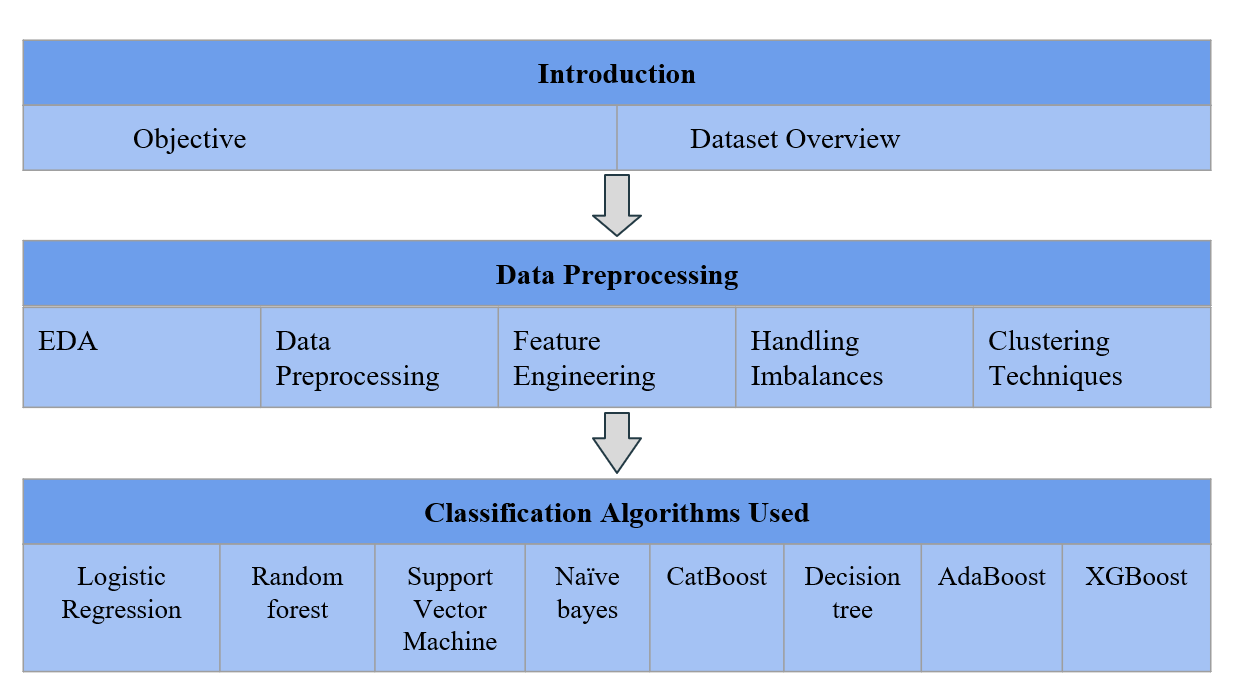

In [1]:
!pip install category_encoders
!pip install xgboost
!pip install catboost




[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: C:\Users\Susanta Baidya\anaconda3\python.exe -m pip install --upgrade pip
Traceback (most recent call last):
  File "C:\Users\Susanta Baidya\anaconda3\Scripts\pip-script.py", line 6, in <module>
    from pip._internal.cli.main import main
  File "C:\Users\Susanta Baidya\AppData\Roaming\Python\Python312\site-packages\pip\_internal\cli\main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "C:\Users\Susanta Baidya\AppData\Roaming\Python\Python312\site-packages\pip\_internal\cli\autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "C:\Users\Susanta Baidya\AppData\Roaming\Python\Python312\site-packages\pip\_internal\cli\main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "C:\Users\Susanta Baidya\AppData\Roaming\Python\Python312\site-packages\pip\_intern

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.7 MB 656.4 kB/s eta 0:02:35
   ---------------------------------------- 0.1/101.7 MB 787.7 kB/s eta 0:02:09
   ---------------------------------------- 0.2/101.7 MB 942.1 kB/s eta 0:01:48
   ---------------------------------------- 0.3/101.7 MB 1.1 MB/s eta 0:01:34
   ---------------------------------------- 0.5/101.7 MB 1.2 MB/s eta 0:01:28
   ---------------------------------------- 0.5/101.7 MB 1.2 MB/s eta 0:01:27
   ---------------------------------------- 0.6/101.7 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 0.7/101.7 MB 1.3 MB/s eta 0:01:16
   ---------------------------------------- 0.9/101.7 MB 1.4 MB/s eta 0:01:13
   ---------------------------------------- 1.0/101.7 MB 1.5 MB/s eta 0:01:10
    --------------------------------------- 1.3/101.7 MB 1.6 MB/s eta 0:01:04
    --------------------------------------- 1.4/101.7 MB 1.6 MB/s


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: C:\Users\Susanta Baidya\anaconda3\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import category_encoders as ce

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer

import plotly.graph_objects as go
from nltk.corpus import stopwords

In [3]:
#Loading the dataset
data = pd.read_csv('US_Accidents_March23.csv')
# data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
#Descriptive statistics of data
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


## EDA

You can add all the analysis done on the data provided


# Most frequent road features where accidents occur

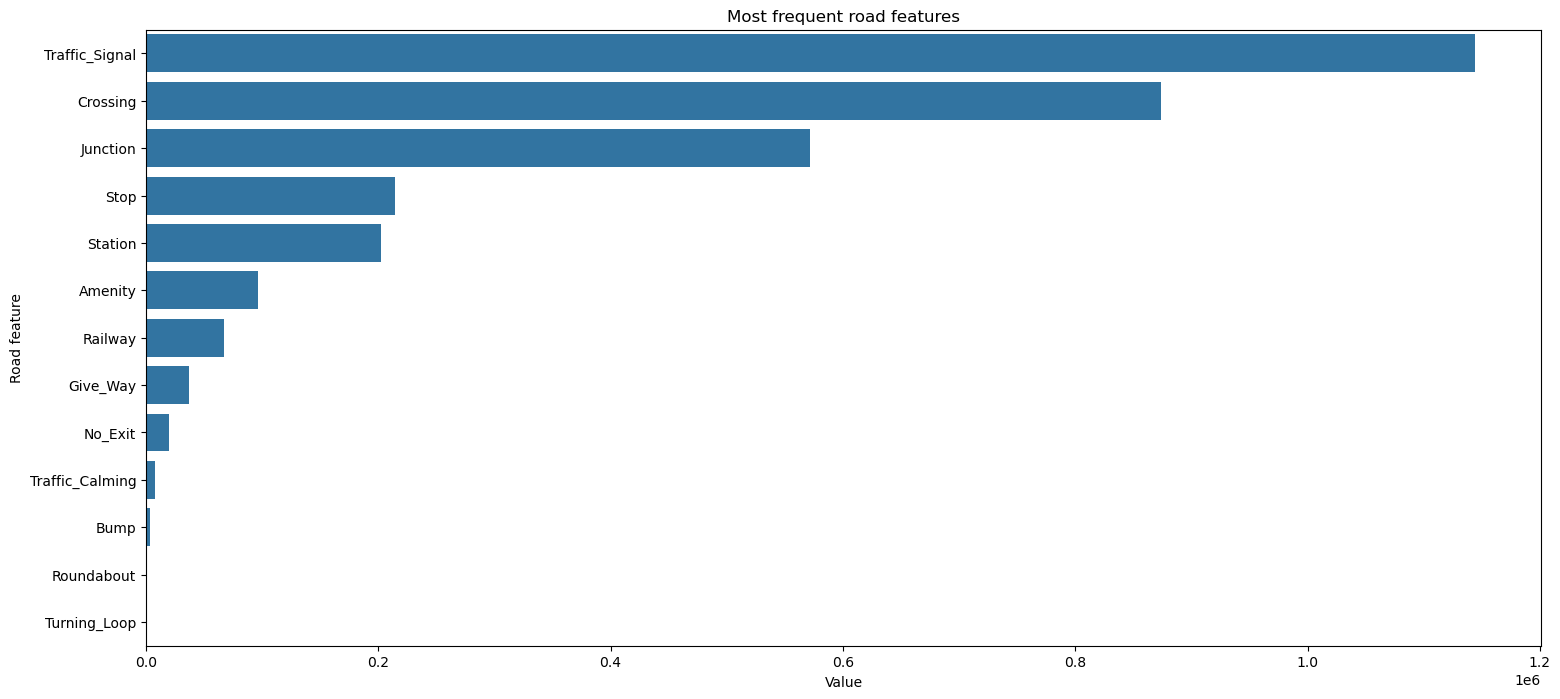

In [5]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
road_data = data[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Most frequent road features")
sns.barplot(x=road_data.values, y=road_data.index, orient="h")
plt.xlabel("Value")
plt.ylabel("Road feature")
plt.show()

# Number of accidents happened on every weekday

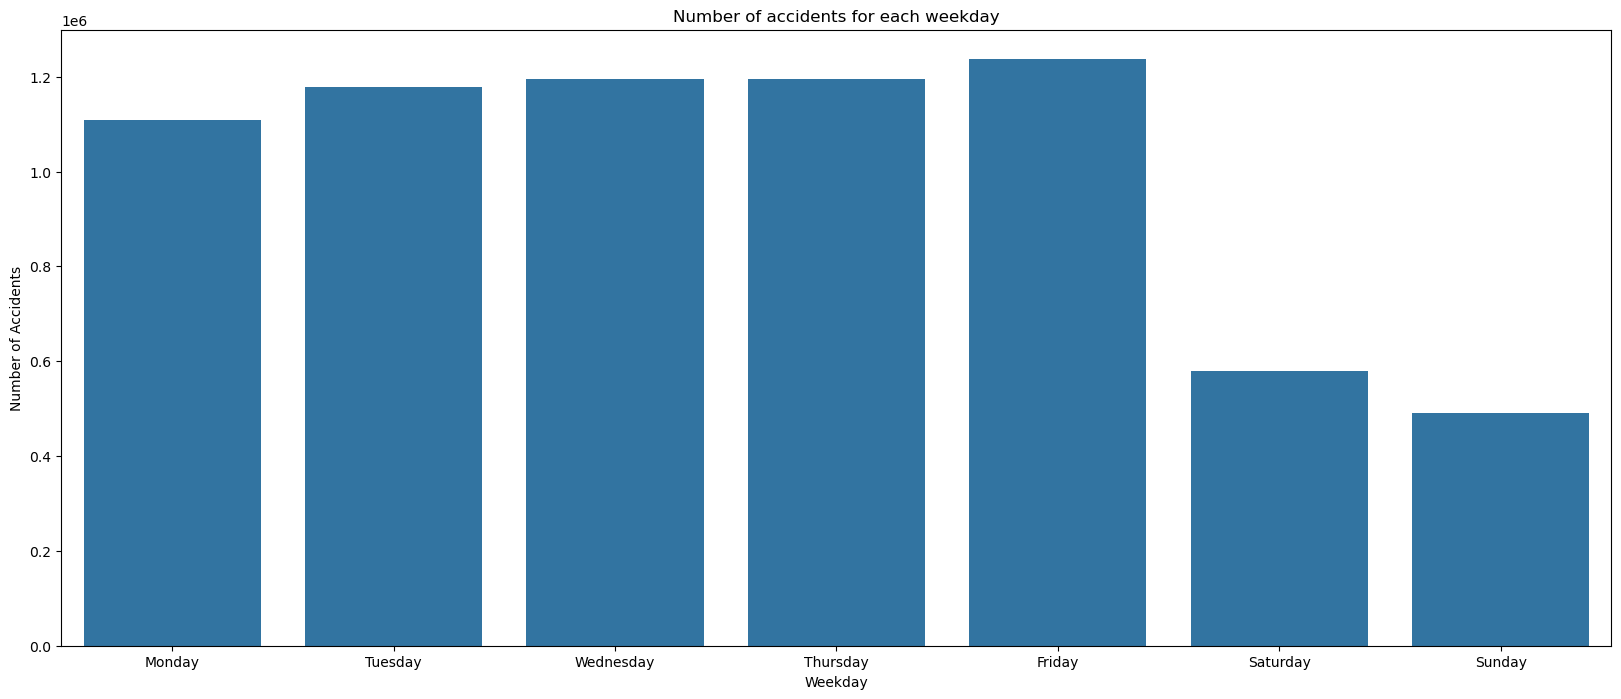

In [6]:
counts = pd.to_datetime(data['Start_Time'], errors='coerce').dt.day_name().value_counts()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each weekday")
sns.barplot(x=counts.index, y=counts.values, order=weekdays)
plt.xlabel("Weekday")
plt.ylabel("Number of Accidents")
plt.show()


As we can see the days with most accidents are on working days, this may be due to the fact that during the weekend there are fewer cars on the road.

## Data Preprocessing

In [7]:
df = data
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


Feature Addition

Decompose the Start_Time feature in year, month, day, weekday, hour and minute

In [8]:
# Cast Start_Time to datetime
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors='coerce')

# Extract year, month, weekday and day
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day

# Extract hour and minute
df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute

df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,Night,Night,Night,Night,2016.0,2.0,0.0,8.0,5.0,46.0
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,Night,Night,Night,Day,2016.0,2.0,0.0,8.0,6.0,7.0
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,Night,Night,Day,Day,2016.0,2.0,0.0,8.0,6.0,49.0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,Night,Day,Day,Day,2016.0,2.0,0.0,8.0,7.0,23.0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,Day,Day,Day,Day,2016.0,2.0,0.0,8.0,7.0,39.0


Splitting the huge data into numerical and object data types for proper data exploration

In [9]:
df_obj = df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(exclude = ['object'])

print(len(df_obj.columns), len(df_num.columns))

19 33


In [10]:
df_obj_nunique = df_obj.nunique().reset_index()
df_obj_nunique.columns = ['columns_name','unique_value_count']
df_obj_nunique['unique_ratio'] = df_obj_nunique['unique_value_count']/df.shape[0]
df_obj_nunique.sort_values(by='unique_ratio', ascending =False)

,columns_name,unique_value_count,unique_ratio
0,ID,7728394,1.000000e+00
2,End_Time,6705355,8.676259e-01
3,Description,3761578,4.867218e-01
12,Weather_Timestamp,941331,1.218016e-01
8,Zipcode,825094,1.067614e-01
4,Street,336306,4.351564e-02
5,City,13678,1.769837e-03
11,Airport_Code,2045,2.646087e-04
6,County,1871,2.420943e-04
14,Weather_Condition,144,1.863259e-05


In [11]:
df_num_nunique = df_num.nunique().reset_index()
df_num_nunique.columns = ['columns_name','unique_value_count']
df_num_nunique['unique_ratio'] = df_num_nunique['unique_value_count']/df.shape[0]
df_num_nunique.sort_values(by='unique_ratio', ascending =False)

,columns_name,unique_value_count,unique_ratio
1,Start_Time,5539720,7.168009e-01
3,Start_Lng,2482533,3.212224e-01
2,Start_Lat,2428358,3.142125e-01
5,End_Lng,1605789,2.077778e-01
4,End_Lat,1568172,2.029105e-01
6,Distance(mi),22382,2.896074e-03
10,Pressure(in),1144,1.480256e-04
8,Wind_Chill(F),1001,1.295224e-04
7,Temperature(F),860,1.112780e-04
13,Precipitation(in),299,3.868850e-05


In [12]:
df_missing = df_num.isnull().sum(axis = 0).reset_index()
df_missing.columns = ['columns_name', 'missing_count']
df_missing['missing_ratio'] = df_missing['missing_count']/df.shape[0]
df_missing.query('missing_ratio > 0').sort_values(by = 'missing_ratio',ascending=False)

,columns_name,missing_count,missing_ratio
4,End_Lat,3402762,0.440294
5,End_Lng,3402762,0.440294
13,Precipitation(in),2203586,0.285129
8,Wind_Chill(F),1999019,0.258659
1,Start_Time,743166,0.096160
27,Year,743166,0.096160
28,Month,743166,0.096160
29,Weekday,743166,0.096160
30,Day,743166,0.096160
31,Hour,743166,0.096160


In [13]:
df_missing = df_obj.isnull().sum(axis = 0).reset_index()
df_missing.columns = ['columns_name', 'missing_count']
df_missing['missing_ratio'] = df_missing['missing_count']/df.shape[0]
df_missing.query('missing_ratio > 0').sort_values(by = 'missing_ratio',ascending=False)

,columns_name,missing_count,missing_ratio
13,Wind_Direction,175206,2.267043e-02
14,Weather_Condition,173459,2.244438e-02
12,Weather_Timestamp,120228,1.555666e-02
15,Sunrise_Sunset,23246,3.007869e-03
16,Civil_Twilight,23246,3.007869e-03
17,Nautical_Twilight,23246,3.007869e-03
18,Astronomical_Twilight,23246,3.007869e-03
11,Airport_Code,22635,2.928810e-03
4,Street,10869,1.406372e-03
10,Timezone,7808,1.010300e-03


From the object columns

->Remove Country: Every instance is of only America, so this column doesn't provide any useful information
->Remove Description: (Can't be used for regression task) # After visualizing it.
->Impute the missing entries via the most-frequent value in that column
->Encode sun-light related and timezones columns

From the numerical columns

->Remove the Turning Loop: All instances have same value, gives no variance to dataset
->Remove End_Lat, End_Lng, Precipitation, Wind Chill Columns as they have many missing values
->Remove all the cols that are very less correlated to the Severity Column

For simplicity we are considering columns to be independent from the Severity target so if there is less variance in a column we will remove it.

In [14]:
df_clean = data[[col for col in data.columns if col not in ['End_Lat','End_Lng', 'Precipitation(in)', 'Wind_Chill(F)', 'Turning_Loop', 'Country']]]
df_clean_obj = df_clean.select_dtypes(include = ['object'])
df_clean_num = df_clean.select_dtypes(exclude = ['object','datetime64'])

print(len(df_clean_obj.columns),len(df_clean_num.columns))

18 27


Drop duplicates


In this section we are going to check if there are some duplicates in the dataset.

In [15]:
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df.index))

Number of rows: 7728394
Number of rows after drop of duplicates: 7728394


Perform simple imputation on the data

In [16]:
# # Using the vectorized version above to speed up the process instead of this.
# Performing simple imputation on numerical and object cols
obj_imputer = SimpleImputer(strategy = 'most_frequent')
df_cl_obj = pd.DataFrame(obj_imputer.fit_transform(df_clean_obj),columns=df_clean_obj.columns, index=df_clean_obj.index)
# df_cl_obj.head()

In [17]:
num_imputer = SimpleImputer(strategy = 'mean')
df_cl_num = pd.DataFrame(num_imputer.fit_transform(df_clean_num),columns=df_clean_num.columns, index=df_clean_num.index)
# df_cl_num.head()

In [18]:
df_clean_num = df_cl_num
df_clean_obj = df_cl_obj

In [19]:
df_clean_obj.columns

Index(['ID', 'Source', 'End_Time', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [20]:
# Example column names to move
columns_to_move = ['Year', 'Day', 'Hour', 'Minute', 'Month', 'Weekday' ]

# Add these columns to df_clean_obj
df_clean_obj = pd.concat([df_clean_obj, df_clean_num[columns_to_move]], axis=1)

# Remove these columns from df_clean_num
df_clean_num = df_clean_num.drop(columns_to_move, axis=1)


Doing Encoding of few Categorical columns

In [21]:
## Convert Dtypes for faster processing of dataset
obj_dtypes = {'Source':'category',
        'Description':'string', 
        'Street':'category',
        'City':'category', 
        'County':'category',
        'State':'category', 
        'Zipcode':'category',
#         'Timezone':'uint8',
        'Airport_Code':'category',
        'Weather_Timestamp':'string',
        'Wind_Direction':'category',
        'Weather_Condition':'string',
        'Sunrise_Sunset':'bool',
        'Civil_Twilight':'bool',
        'Nautical_Twilight':'bool', 
        'Astronomical_Twilight':'bool',
#         'End_Time':'datetime64[ns]',
        'Year':'uint16',
        'Day':'uint8',
        'Hour':'uint8',
        'Minute': 'uint8',
        'Weekday': 'category',
        'Month':'category'}

num_dtypes = { 'Severity':'uint8',
            'Start_Lat': 'float32',
            'Start_Lng': 'float32',
            'Distance(mi)': 'float32',
            'Temperature(F)': 'float32',
            'Humidity(%)': 'float32',
            'Pressure(in)': 'float32',
            'Visibility(mi)': 'float32',
            'Wind_Speed(mph)': 'float32',
            'Amenity':'bool',
            'Bump':"bool",
            'Crossing':'bool',
            'Give_Way':'bool',
            'Junction':'bool',
            'No_Exit':'bool',
            'Railway':'bool',
            'Roundabout':'bool',
            'Station':'bool', 
            'Stop':'bool',
            'Traffic_Calming':'bool',
            'Traffic_Signal':'bool',
             }
df_clean_obj = df_clean_obj.astype(obj_dtypes)
df_clean_num = df_clean_num.astype(num_dtypes)

In [22]:
df_clean = pd.concat([df_clean_num,df_clean_obj],axis = 1)
df_clean.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Day,Hour,Minute,Month,Weekday
0,3,39.865147,-84.058723,0.01,36.900002,91.0,29.680000,10.0,7.68549,False,...,True,True,True,True,2016,8,5,46,2.0,0.0
1,2,39.928059,-82.831184,0.01,37.900002,100.0,29.650000,10.0,7.68549,False,...,True,True,True,True,2016,8,6,7,2.0,0.0
2,2,39.063148,-84.032608,0.01,36.000000,100.0,29.670000,10.0,3.50000,False,...,True,True,True,True,2016,8,6,49,2.0,0.0
3,3,39.747753,-84.205582,0.01,35.099998,96.0,29.639999,9.0,4.60000,False,...,True,True,True,True,2016,8,7,23,2.0,0.0
4,2,39.627781,-84.188354,0.01,36.000000,89.0,29.650000,6.0,3.50000,False,...,True,True,True,True,2016,8,7,39,2.0,0.0


In [23]:
df_clean.shape

(7728394, 45)

In [24]:
df_clean.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Year,Day,Hour,Minute
count,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06
mean,2.212384e+00,3.620118e+01,-9.470249e+01,5.618423e-01,6.166330e+01,6.483109e+01,2.953901e+01,9.090382e+00,7.685488e+00,2.019634e+03,1.568655e+01,1.224204e+01,2.974600e+01
std,4.875313e-01,5.043543e+00,1.728299e+01,1.754878e+00,1.871466e+01,2.250894e+01,1.830972e+00,2.800123e+00,5.161664e+00,1.807547e+00,8.262945e+00,5.187188e+00,1.641291e+01
min,1.000000e+00,2.455480e+01,-1.246238e+02,0.000000e+00,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,0.000000e+00,5.000000e+01,4.900000e+01,2.938000e+01,1.000000e+01,5.000000e+00,2.018000e+03,9.000000e+00,8.000000e+00,1.700000e+01
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.000000e-02,6.300000e+01,6.600000e+01,2.985000e+01,1.000000e+01,7.685490e+00,2.020000e+03,1.500000e+01,1.200000e+01,2.900000e+01
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.640000e-01,7.600000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.000000e+01,2.021000e+03,2.200000e+01,1.600000e+01,4.300000e+01
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.417500e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,2.023000e+03,3.100000e+01,2.300000e+01,5.900000e+01


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 45 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   Severity               uint8   
 1   Start_Lat              float32 
 2   Start_Lng              float32 
 3   Distance(mi)           float32 
 4   Temperature(F)         float32 
 5   Humidity(%)            float32 
 6   Pressure(in)           float32 
 7   Visibility(mi)         float32 
 8   Wind_Speed(mph)        float32 
 9   Amenity                bool    
 10  Bump                   bool    
 11  Crossing               bool    
 12  Give_Way               bool    
 13  Junction               bool    
 14  No_Exit                bool    
 15  Railway                bool    
 16  Roundabout             bool    
 17  Station                bool    
 18  Stop                   bool    
 19  Traffic_Calming        bool    
 20  Traffic_Signal         bool    
 21  ID                     object  

In [26]:
### Seeing the nullness of all the attributes
df_missing = df_clean.isnull().sum(axis = 0).reset_index()
df_missing.columns = ['columns_name', 'missing_count']
df_missing['missing_ratio'] = df_missing['missing_count']/df_clean.shape[0]
df_missing['data_type'] = [df_clean[col].dtypes for col in df_missing.columns_name[:]]
df_missing.query('missing_ratio > 0').sort_values(by = ['missing_ratio','data_type'], ascending = False)

,columns_name,missing_count,missing_ratio,data_type


In [27]:
df_clean.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'ID', 'Source', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Day', 'Hour', 'Minute', 'Month',
       'Weekday'],
      dtype='object')

In [28]:
df_clean = df_clean.drop(['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)


# Check correlation between features

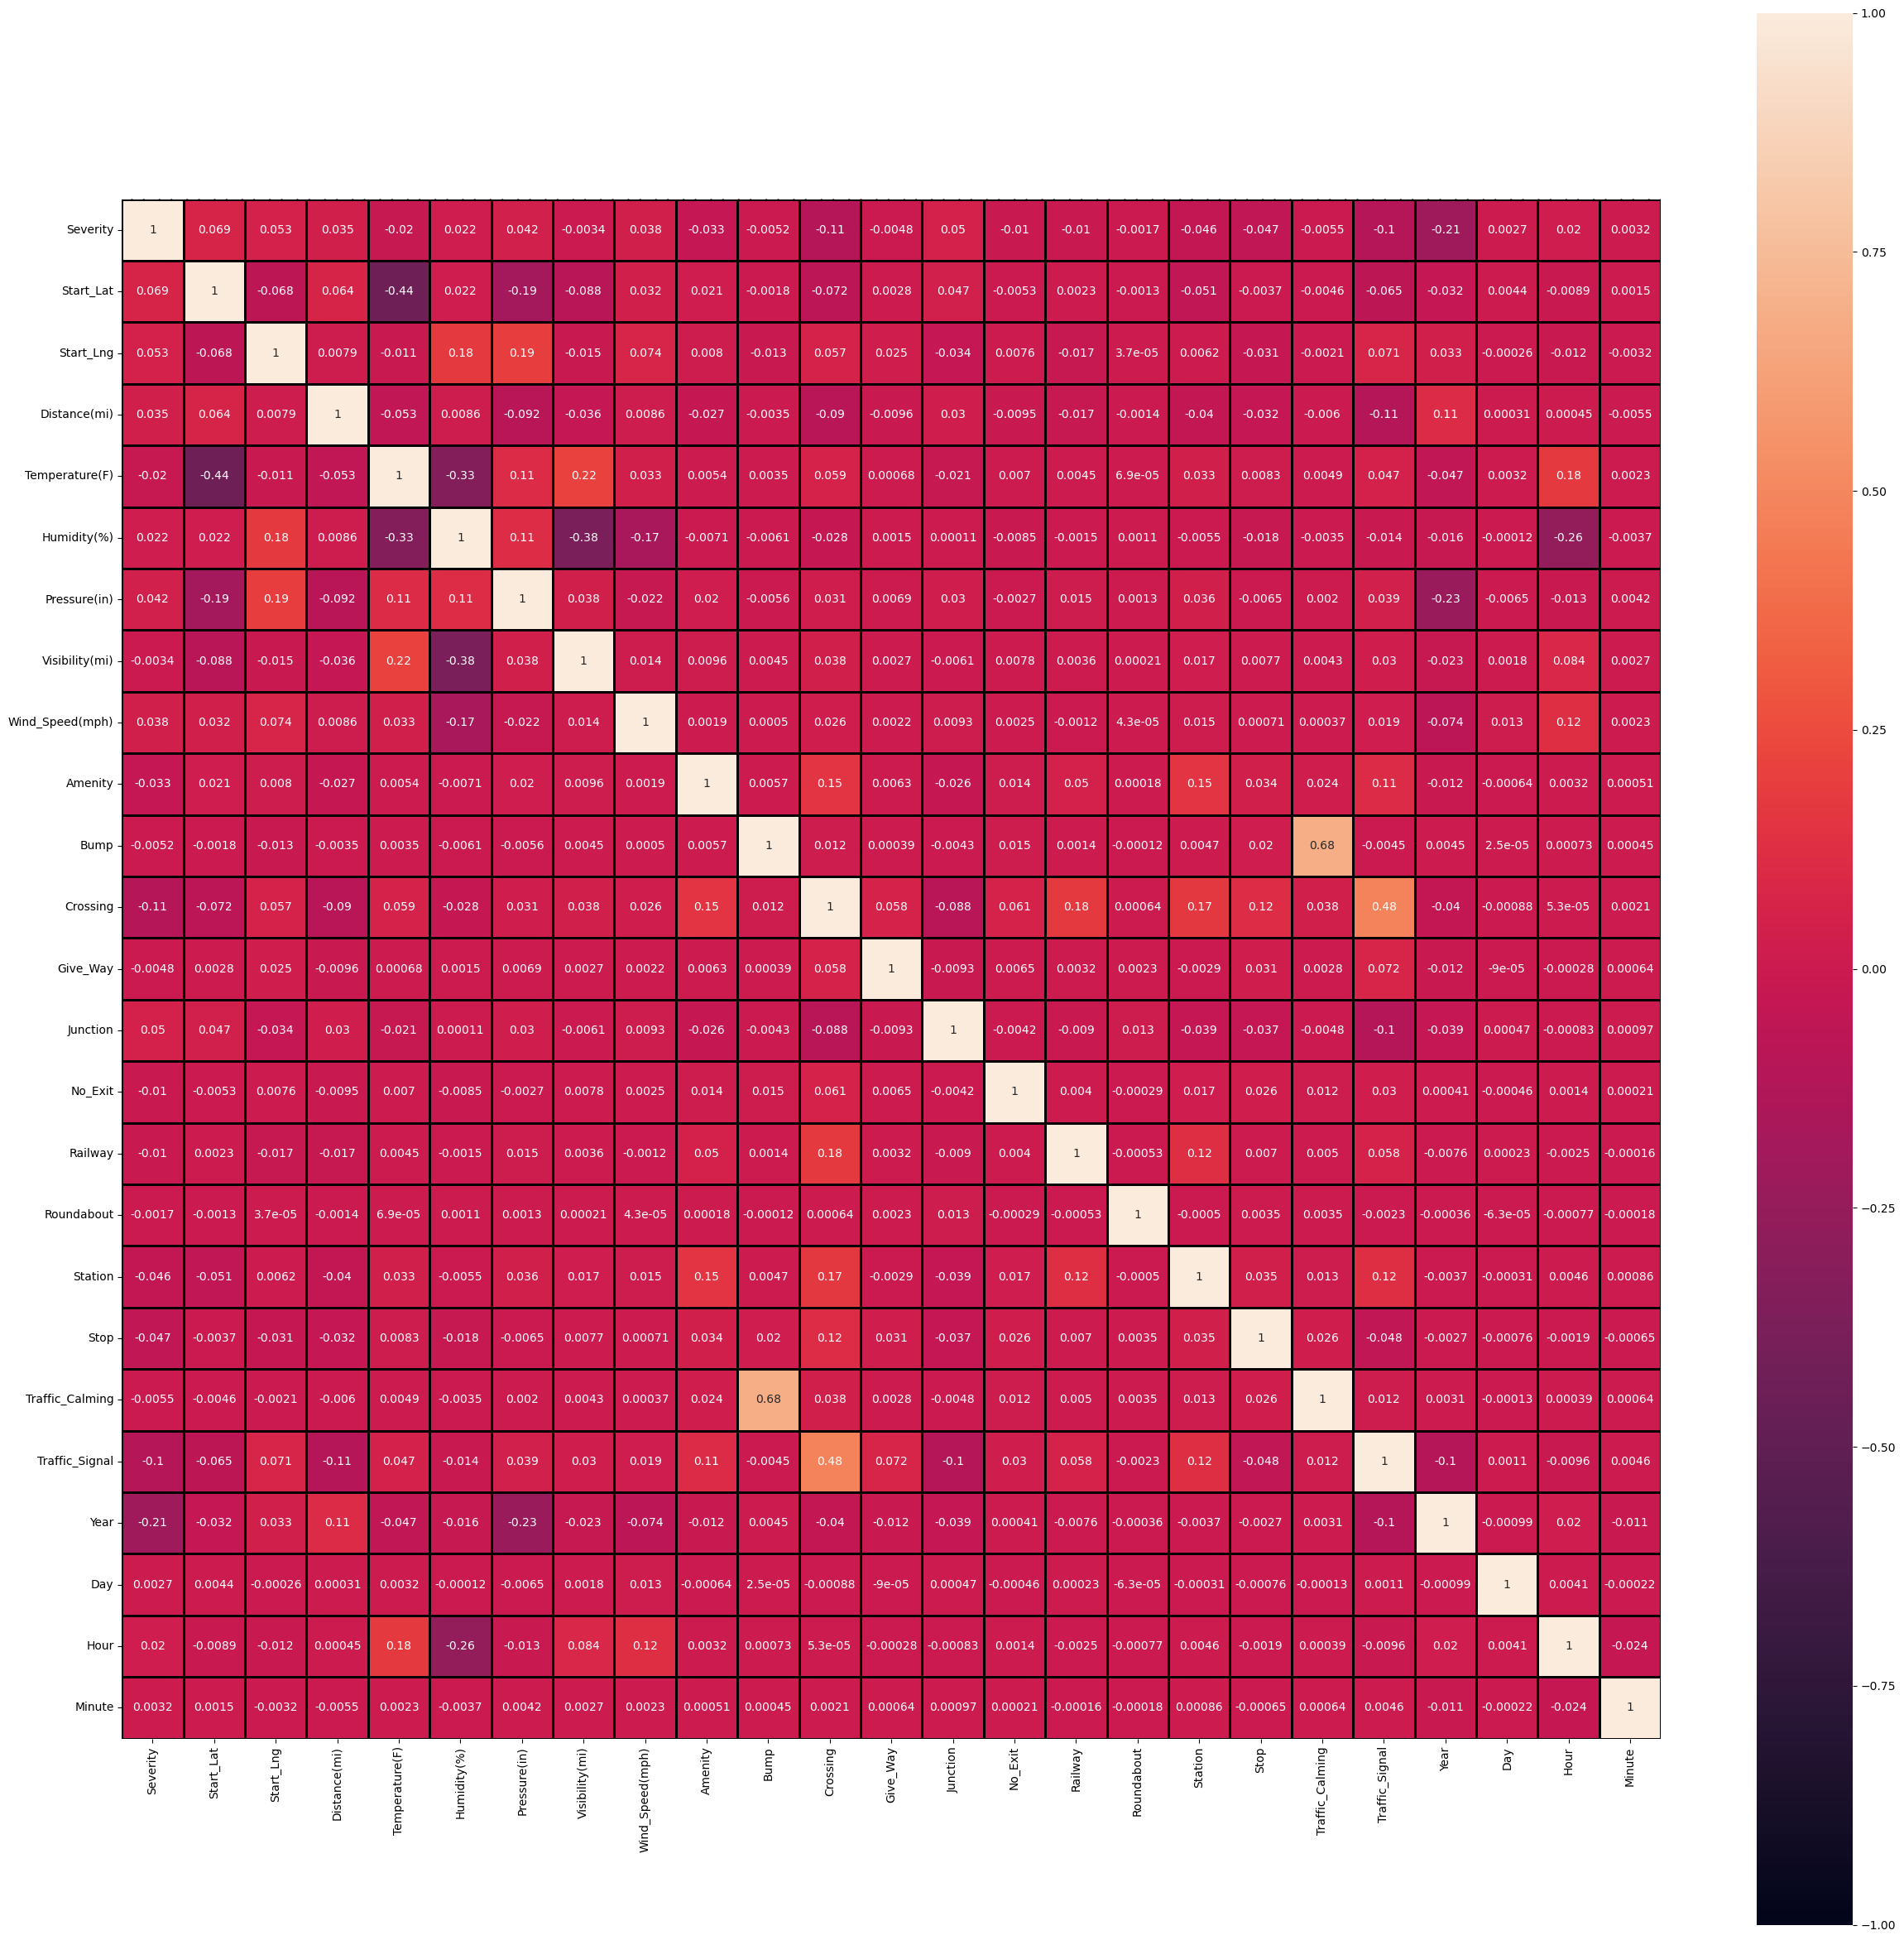

In [29]:
corr_matrix = df_clean.corr(numeric_only=True)
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix,annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.show()

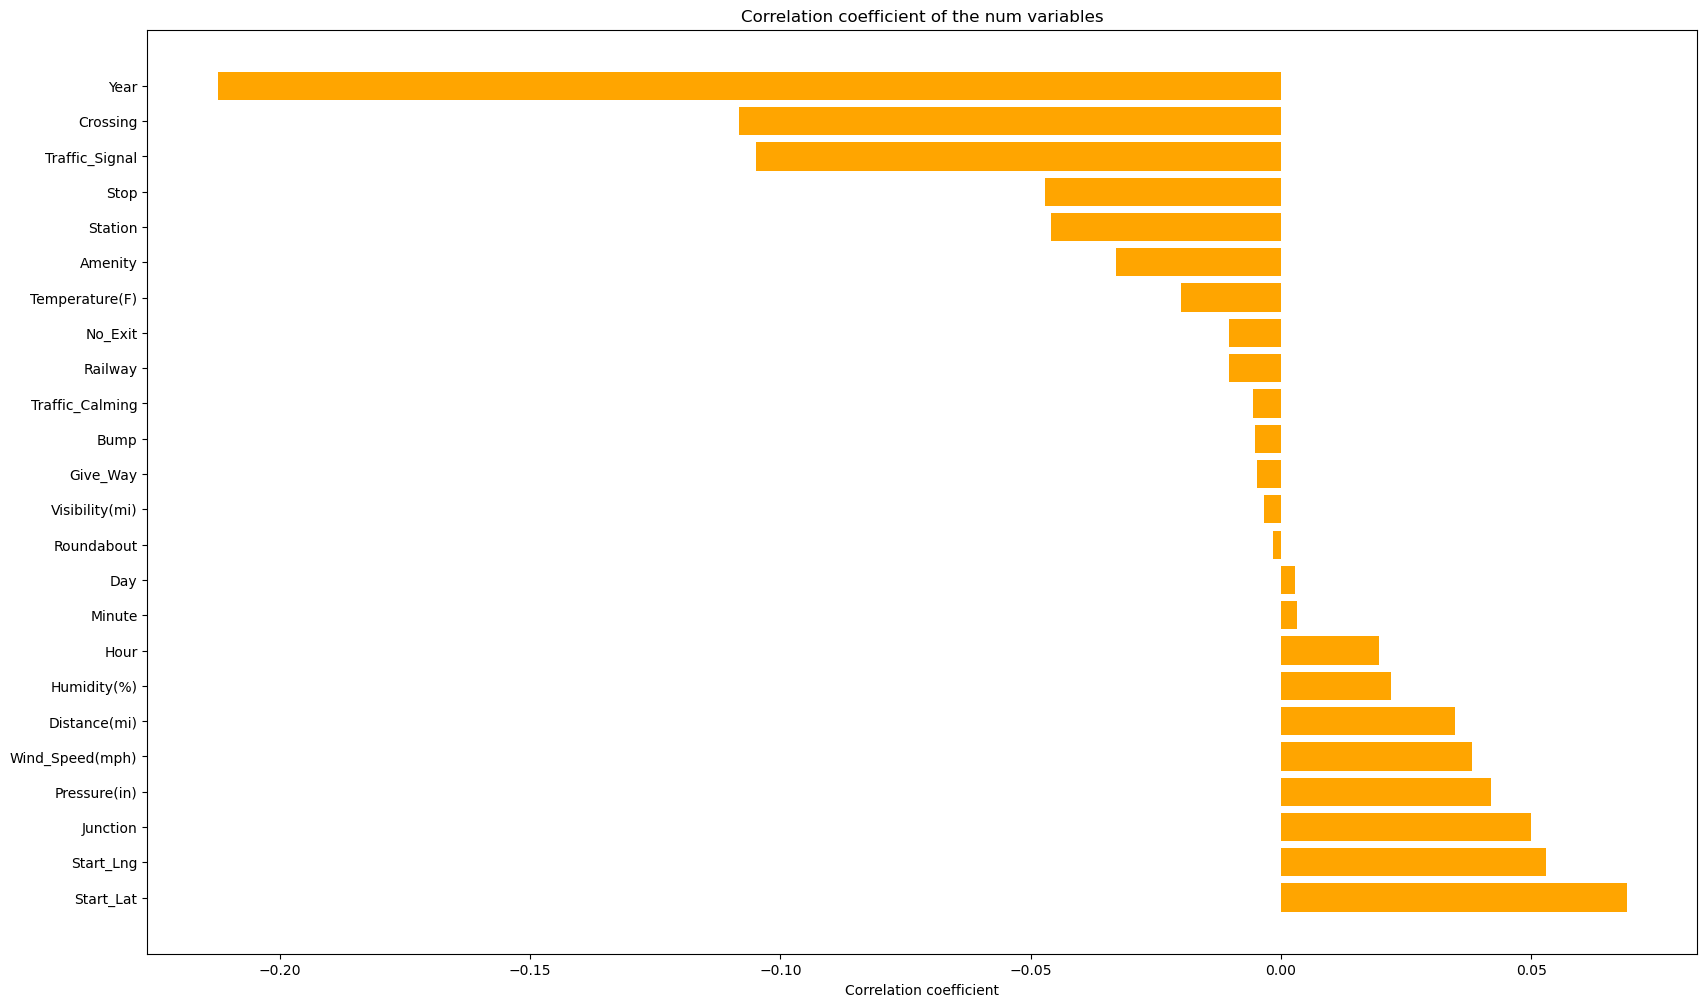

In [30]:
### Correlation between num features wrt the target attributes
x_cols = [col for col in df_clean.columns if col not in ['Severity'] if df_clean[col].dtype in ['float32','uint8','bool','uint16']]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df_clean[col].values, df_clean.Severity.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = (corr_df.sort_values(by='corr_values',ascending = False)).reset_index()
corr_df

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(20,12))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='orange')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the num variables")
plt.show()

Observations

We remove most of the features that have a less than or equal to +/- 0.01 coorelation to Severity

In [31]:
# All these less correlated features will be removed
less_corr_features = corr_df[(corr_df.corr_values>=-0.01) & (corr_df.corr_values<=0.01)].col_labels[:]
less_corr = less_corr_features.to_list()
less_corr

['Minute',
 'Day',
 'Roundabout',
 'Visibility(mi)',
 'Give_Way',
 'Bump',
 'Traffic_Calming']

# Observing Year wise distribution of Accidents for every level of Severity

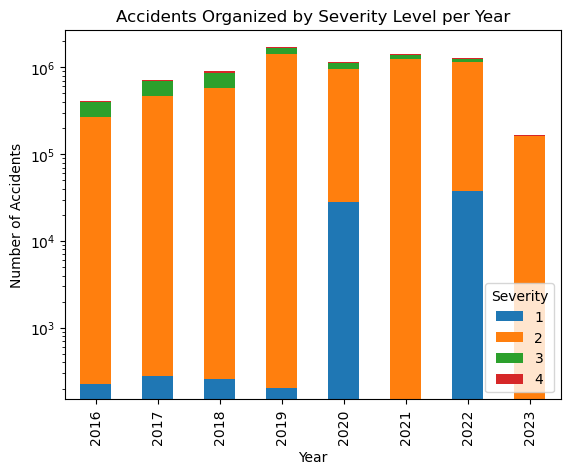

In [32]:
# Perform groupby operation
grouped = df_clean.groupby(['Year', 'Severity'])['Start_Lat'].count()

# Convert the result to a DataFrame
df_pivot = grouped.reset_index()

# Pivot the DataFrame
df_pivot = df_pivot.pivot(index='Year', columns='Severity', values='Start_Lat')

# Display the pivoted DataFrame
#print(df_pivot)

# Plot the stacked bar chart
ax = df_pivot.plot.bar(stacked=True)

# Set the y-axis scale to logarithmic
ax.set_yscale("log")
# Set the title and axis labels
plt.title("Accidents Organized by Severity Level per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.savefig("Accidents_Organized_by_Severity_Level_per_Year.png",bbox_inches = 'tight', dpi = 300)
# Show the plot
plt.show()

Observations

-> Over the years we have more number of accidents but with accidents are becoming less severe

-> Another observation we can make that accident's are increasing over the years

# Feature selection

We drop all the less correlated columns

We drop descriptions, as most descriptions only report the name of the road of the accident, so dropping it ensures simplicity

We drop street, county, zipcode, state and only keep city to focus as a mid data point from all the spatial features having just enough values to be numerically encoded

We drop Airport_Code, Weather_Timestamp because they are not useful much for our task

We drop Start and End Time, because we have the same information in Hr itself.


In [33]:
dropped_cols = less_corr + ["Description",'ID','Street','County','Zipcode','State','Airport_Code','Weather_Timestamp','End_Time']
dropped_cols

['Minute',
 'Day',
 'Roundabout',
 'Visibility(mi)',
 'Give_Way',
 'Bump',
 'Traffic_Calming',
 'Description',
 'ID',
 'Street',
 'County',
 'Zipcode',
 'State',
 'Airport_Code',
 'Weather_Timestamp',
 'End_Time']

In [34]:
df_clean = df_clean.drop(dropped_cols,axis = 1)

In [35]:
df_clean.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,...,Traffic_Signal,Source,City,Timezone,Wind_Direction,Weather_Condition,Year,Hour,Month,Weekday
0,3,39.865147,-84.058723,0.01,36.900002,91.0,29.680000,7.68549,False,False,...,False,Source2,Dayton,US/Eastern,Calm,Light Rain,2016,5,2.0,0.0
1,2,39.928059,-82.831184,0.01,37.900002,100.0,29.650000,7.68549,False,False,...,False,Source2,Reynoldsburg,US/Eastern,Calm,Light Rain,2016,6,2.0,0.0
2,2,39.063148,-84.032608,0.01,36.000000,100.0,29.670000,3.50000,False,False,...,True,Source2,Williamsburg,US/Eastern,SW,Overcast,2016,6,2.0,0.0
3,3,39.747753,-84.205582,0.01,35.099998,96.0,29.639999,4.60000,False,False,...,False,Source2,Dayton,US/Eastern,SW,Mostly Cloudy,2016,7,2.0,0.0
4,2,39.627781,-84.188354,0.01,36.000000,89.0,29.650000,3.50000,False,False,...,True,Source2,Dayton,US/Eastern,SW,Mostly Cloudy,2016,7,2.0,0.0


In [36]:
df_clean.describe().round(3)

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Year,Hour
count,7728394.000,7728394.000,7728394.000,7728394.000,7728394.000,7728394.000,7728394.000,7728394.000,7728394.000,7728394.000
mean,2.212,36.201,-94.702,0.562,61.663,64.831,29.539,7.685,2019.634,12.242
std,0.488,5.044,17.283,1.755,18.715,22.509,1.831,5.162,1.808,5.187
min,1.000,24.555,-124.624,0.000,-89.000,1.000,0.000,0.000,2016.000,0.000
25%,2.000,33.400,-117.219,0.000,50.000,49.000,29.380,5.000,2018.000,8.000
50%,2.000,35.824,-87.767,0.030,63.000,66.000,29.850,7.685,2020.000,12.000
75%,2.000,40.085,-80.354,0.464,76.000,84.000,30.030,10.000,2021.000,16.000
max,4.000,49.002,-67.113,441.750,207.000,100.000,58.630,1087.000,2023.000,23.000


In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 25 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Severity           uint8   
 1   Start_Lat          float32 
 2   Start_Lng          float32 
 3   Distance(mi)       float32 
 4   Temperature(F)     float32 
 5   Humidity(%)        float32 
 6   Pressure(in)       float32 
 7   Wind_Speed(mph)    float32 
 8   Amenity            bool    
 9   Crossing           bool    
 10  Junction           bool    
 11  No_Exit            bool    
 12  Railway            bool    
 13  Station            bool    
 14  Stop               bool    
 15  Traffic_Signal     bool    
 16  Source             category
 17  City               category
 18  Timezone           object  
 19  Wind_Direction     category
 20  Weather_Condition  string  
 21  Year               uint16  
 22  Hour               uint8   
 23  Month              category
 24  Weekday            categ

# Categorizing the categorical columns

In [38]:
unique_weather = (df_clean["Weather_Condition"].unique())

print(len(unique_weather))
print(list((unique_weather)))

144
['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow', 'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow', 'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog', 'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', 'Fair', 'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog', 'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain', 'Thunderstorms and Rain', 'Volcanic Ash', 'Blowing Sand', 'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy', 'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy', 'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm', 'Light Rain Shower', 'Light Rain with Thunder', 'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm', 'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm', 'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow', 'Light Thunderstorms and Snow', 'Heavy Snow', 'Low Drifting Snow', 'Light Ice Pellets', 'Ice Pellets', 'Squalls', 'N/A Precipitation', '

In [39]:
# Categorizing the weather conditions
#Assign categories based on weather conditions
df_clean.loc[df_clean["Weather_Condition"].str.contains("Rain|Drizzle|Shower|Precipitation", na=False), "Weather_Condition"] = "Rain"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Cloudy|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Fog|Mist", na=False), "Weather_Condition"] = "Fog"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Clear|Fair", na=False), "Weather_Condition"] = "Clear"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"

df_clean["Weather_Condition"] = df_clean["Weather_Condition"].astype('category')

In [40]:
df_clean.Weather_Condition.value_counts()

Weather_Condition
Clear               3578675
Cloudy              2958899
Rain                 543704
Scattered Clouds     204829
Snow                 173283
Fog                  111807
Haze                  76223
Thunderstorm          65229
Smoke                 12786
Windy                  1677
Sand                    747
Hail                    484
Funnel Cloud             22
Tornado                  19
Light Haze               10
Name: count, dtype: int64

In [41]:
# Categorizing the wind direction 
df_clean["Wind_Direction"].unique().to_list()

C:\Users\Susanta Baidya\AppData\Local\Temp\ipykernel_15484\3449947514.py:2: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  df_clean["Wind_Direction"].unique().to_list()


['Calm',
 'SW',
 'SSW',
 'WSW',
 'WNW',
 'NW',
 'West',
 'NNW',
 'NNE',
 'South',
 'North',
 'Variable',
 'SE',
 'SSE',
 'ESE',
 'East',
 'NE',
 'ENE',
 'E',
 'W',
 'CALM',
 'S',
 'VAR',
 'N']

In [42]:
conditions = [
    df_clean['Wind_Direction'].str.contains('N', case=False, na=False),
    df_clean['Wind_Direction'].str.contains('S', case=False, na=False),
    df_clean['Wind_Direction'].str.contains('E', case=False, na=False),
    df_clean['Wind_Direction'].str.contains('W', case=False, na=False),
    df_clean['Wind_Direction'].str.contains('V|C', case=False, na=False)
]

choices = ['North', 'South', 'East', 'West', 'Variable']
df_clean['Wind_Direction'] = np.select(conditions, choices, default=df_clean['Wind_Direction'])

df_clean['Wind_Direction'] = df_clean['Wind_Direction'].astype('category')

In [43]:
df_clean["Wind_Direction"].unique().to_list()

C:\Users\Susanta Baidya\AppData\Local\Temp\ipykernel_15484\1758275280.py:1: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  df_clean["Wind_Direction"].unique().to_list()


['Variable', 'South', 'North', 'East', 'West']

In [44]:
df_clean.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Wind_Speed(mph)      0
Amenity              0
Crossing             0
Junction             0
No_Exit              0
Railway              0
Station              0
Stop                 0
Traffic_Signal       0
Source               0
City                 0
Timezone             0
Wind_Direction       0
Weather_Condition    0
Year                 0
Hour                 0
Month                0
Weekday              0
dtype: int64

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 25 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Severity           uint8   
 1   Start_Lat          float32 
 2   Start_Lng          float32 
 3   Distance(mi)       float32 
 4   Temperature(F)     float32 
 5   Humidity(%)        float32 
 6   Pressure(in)       float32 
 7   Wind_Speed(mph)    float32 
 8   Amenity            bool    
 9   Crossing           bool    
 10  Junction           bool    
 11  No_Exit            bool    
 12  Railway            bool    
 13  Station            bool    
 14  Stop               bool    
 15  Traffic_Signal     bool    
 16  Source             category
 17  City               category
 18  Timezone           object  
 19  Wind_Direction     category
 20  Weather_Condition  category
 21  Year               uint16  
 22  Hour               uint8   
 23  Month              category
 24  Weekday            categ

# Handling Unbalanced Data before encoding the categorical columns

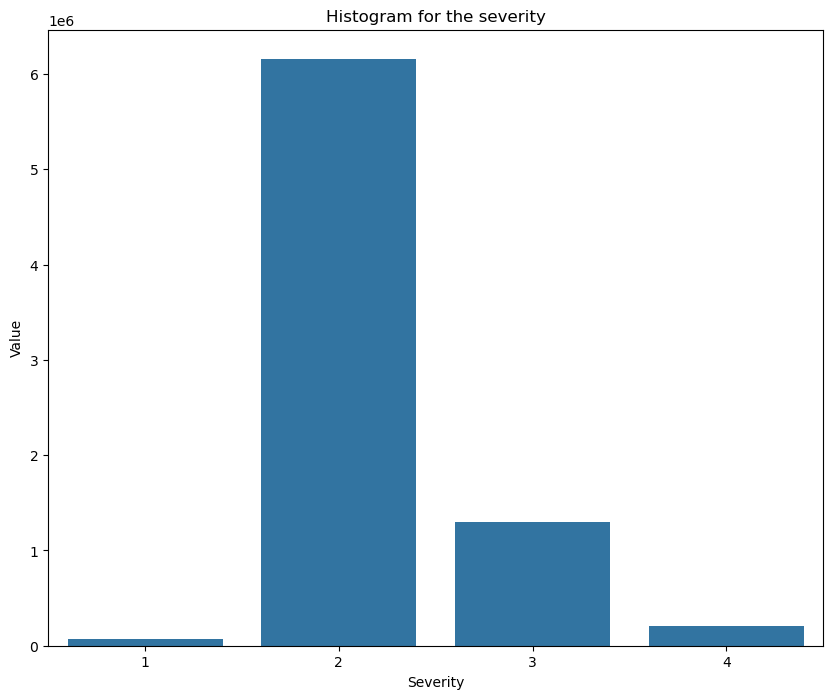

In [46]:
severity_counts = df_clean["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(x = severity_counts.index,y=severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.savefig("UnBalanced_Severity.png",bbox_inches = 'tight', dpi = 300)
plt.show()

We can see we have highly unbalanced data wrt 2nd Severity level

To balance it, we will undersample the records to match the number of records of Severity level 1 i.e. the minority category

So we undersample 2, 3, 4 Severity level instances randomly to the minority category

In [47]:
size = len(df_clean[df_clean["Severity"]==1].index)
size

67366

In [48]:
x = pd.DataFrame()
for i in range(1,5):
    S = df_clean[df_clean["Severity"]==i]
    x = pd.concat([x,S.sample(size, random_state=42)],axis = 0)
df_balanced = x

In [49]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269464 entries, 7145867 to 5555644
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Severity           269464 non-null  uint8   
 1   Start_Lat          269464 non-null  float32 
 2   Start_Lng          269464 non-null  float32 
 3   Distance(mi)       269464 non-null  float32 
 4   Temperature(F)     269464 non-null  float32 
 5   Humidity(%)        269464 non-null  float32 
 6   Pressure(in)       269464 non-null  float32 
 7   Wind_Speed(mph)    269464 non-null  float32 
 8   Amenity            269464 non-null  bool    
 9   Crossing           269464 non-null  bool    
 10  Junction           269464 non-null  bool    
 11  No_Exit            269464 non-null  bool    
 12  Railway            269464 non-null  bool    
 13  Station            269464 non-null  bool    
 14  Stop               269464 non-null  bool    
 15  Traffic_Signal     269464 non-nu

In [50]:
df_balanced.shape

(269464, 25)

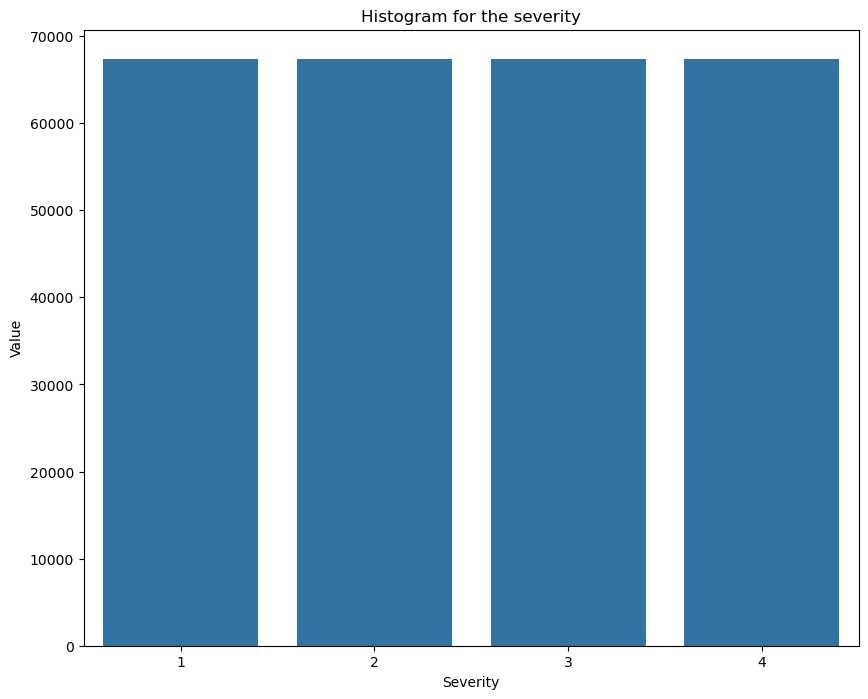

In [51]:
severity_counts = df_balanced["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(x = severity_counts.index,y=severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.savefig("Balanced_Severity.png",bbox_inches = 'tight', dpi = 300)
plt.show()

# Feature scaling

In [52]:
df_balanced = df_balanced.drop('Timezone', axis=1)

In [53]:
num_features = (df_balanced.select_dtypes(include = ['float32','uint8','uint16',],exclude = ['bool']).columns).to_list()
cat_features = (df_balanced.select_dtypes(exclude = ['float32','uint8','uint16','bool','int64']).columns).to_list()
bool_features = (df_balanced.select_dtypes(include= ['bool']).columns).to_list()

In [54]:
cat_features,num_features,bool_features

(['Source', 'City', 'Wind_Direction', 'Weather_Condition', 'Month', 'Weekday'],
 ['Severity',
  'Start_Lat',
  'Start_Lng',
  'Distance(mi)',
  'Temperature(F)',
  'Humidity(%)',
  'Pressure(in)',
  'Wind_Speed(mph)',
  'Year',
  'Hour'],
 ['Amenity',
  'Crossing',
  'Junction',
  'No_Exit',
  'Railway',
  'Station',
  'Stop',
  'Traffic_Signal'])

In [55]:
num_features.remove("Severity")

In [56]:
scaler = MinMaxScaler()
#features = ['Temperature(F)','Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(,'Start_Lng','Start_Lat','Year', 'Month','Weekday','Day','Hour','Minute']
df_balanced[num_features] = scaler.fit_transform(df_balanced[num_features])
df_balanced

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,...,Stop,Traffic_Signal,Source,City,Wind_Direction,Weather_Condition,Year,Hour,Month,Weekday
7145867,1,0.553481,0.688985,0.000000,0.706587,0.515152,0.945734,0.043130,False,False,...,False,True,Source1,Louisville,North,Cloudy,0.571442,0.652174,4.0,4.0
609112,1,0.421437,0.749335,0.000000,0.862275,0.363636,0.925793,0.055453,False,False,...,False,True,Source2,Greenville,South,Clear,0.857147,0.695652,5.0,3.0
517814,1,0.432971,0.696456,0.000000,0.784431,0.686869,0.947695,0.036969,False,False,...,False,False,Source2,Hixson,South,Cloudy,0.857147,0.478261,9.0,4.0
7094443,1,0.365561,0.220643,0.000000,0.754491,0.141414,0.925139,0.104744,False,True,...,False,True,Source1,Phoenix,West,Clear,0.571442,0.739130,3.0,6.0
599837,1,0.576941,0.055129,0.000000,0.730539,0.303030,0.958156,0.080099,False,False,...,False,True,Source2,Sacramento,South,Clear,0.857147,0.869565,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351803,4,0.698153,0.931528,0.000808,0.754491,0.535354,0.960772,0.092421,False,False,...,False,False,Source1,Jewett City,South,Clear,0.428589,0.652174,9.0,5.0
4951621,4,0.588791,0.352920,0.002894,0.790419,0.292929,0.755803,0.086260,False,False,...,False,False,Source1,Peyton,South,Clear,0.857147,0.608696,7.0,1.0
4157221,4,0.445949,0.767069,0.000229,0.682635,0.313131,0.949330,0.030807,False,False,...,False,False,Source1,Lincolnton,South,Clear,0.857147,0.652174,4.0,2.0
7238144,4,0.386536,0.819854,0.000328,0.652695,0.616162,0.966656,0.030807,False,False,...,False,False,Source1,Supply,North,Clear,0.428589,0.782609,12.0,1.0


# Encoding Categorical Cols

In [57]:
df_balanced = df_balanced.replace([True, False], [1, 0])
df_balanced[bool_features] = df_balanced[bool_features].astype('uint8')
df_balanced.head()

C:\Users\Susanta Baidya\AppData\Local\Temp\ipykernel_15484\577977685.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_balanced = df_balanced.replace([True, False], [1, 0])


,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,...,Stop,Traffic_Signal,Source,City,Wind_Direction,Weather_Condition,Year,Hour,Month,Weekday
7145867,1,0.553481,0.688985,0.0,0.706587,0.515152,0.945734,0.043130,0,0,...,0,1,Source1,Louisville,North,Cloudy,0.571442,0.652174,4.0,4.0
609112,1,0.421437,0.749335,0.0,0.862275,0.363636,0.925793,0.055453,0,0,...,0,1,Source2,Greenville,South,Clear,0.857147,0.695652,5.0,3.0
517814,1,0.432971,0.696456,0.0,0.784431,0.686869,0.947695,0.036969,0,0,...,0,0,Source2,Hixson,South,Cloudy,0.857147,0.478261,9.0,4.0
7094443,1,0.365561,0.220643,0.0,0.754491,0.141414,0.925139,0.104744,0,1,...,0,1,Source1,Phoenix,West,Clear,0.571442,0.739130,3.0,6.0
599837,1,0.576941,0.055129,0.0,0.730539,0.303030,0.958156,0.080099,0,0,...,0,1,Source2,Sacramento,South,Clear,0.857147,0.869565,5.0,0.0


In [58]:
# Checkpoint creation of balanced dataset
name_p = "test.pickle"
df_balanced.to_pickle(name_p)

In [59]:
df_balanced = pd.read_pickle(name_p)

In [60]:
onehot_cols = list(set(cat_features) - set(["City"]))
onehot_cols

['Month', 'Weekday', 'Source', 'Weather_Condition', 'Wind_Direction']

In [61]:
df_balanced = pd.get_dummies(df_balanced, columns=onehot_cols, drop_first=True)
df_balanced.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,...,Weather_Condition_Scattered Clouds,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy,Wind_Direction_North,Wind_Direction_South,Wind_Direction_Variable,Wind_Direction_West
7145867,1,0.553481,0.688985,0.0,0.706587,0.515152,0.945734,0.043130,0,0,...,False,False,False,False,False,False,True,False,False,False
609112,1,0.421437,0.749335,0.0,0.862275,0.363636,0.925793,0.055453,0,0,...,False,False,False,False,False,False,False,True,False,False
517814,1,0.432971,0.696456,0.0,0.784431,0.686869,0.947695,0.036969,0,0,...,False,False,False,False,False,False,False,True,False,False
7094443,1,0.365561,0.220643,0.0,0.754491,0.141414,0.925139,0.104744,0,1,...,False,False,False,False,False,False,False,False,False,True
599837,1,0.576941,0.055129,0.0,0.730539,0.303030,0.958156,0.080099,0,0,...,False,False,False,False,False,False,False,True,False,False


In [62]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269464 entries, 7145867 to 5555644
Data columns (total 58 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   Severity                            269464 non-null  uint8   
 1   Start_Lat                           269464 non-null  float32 
 2   Start_Lng                           269464 non-null  float32 
 3   Distance(mi)                        269464 non-null  float32 
 4   Temperature(F)                      269464 non-null  float32 
 5   Humidity(%)                         269464 non-null  float32 
 6   Pressure(in)                        269464 non-null  float32 
 7   Wind_Speed(mph)                     269464 non-null  float32 
 8   Amenity                             269464 non-null  uint8   
 9   Crossing                            269464 non-null  uint8   
 10  Junction                            269464 non-null  uint8   
 11  No_Exit    

Now, remains only to encode the City feature. In order to, reduce the usage of memory and the number of features we used the BinaryEncoder included in the library category_encoders.

In [63]:
binary_encoder = ce.binary.BinaryEncoder()

city_binary_enc = binary_encoder.fit_transform(df_balanced["City"])
city_binary_enc

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13
7145867,0,0,0,0,0,0,0,0,0,0,0,0,0,1
609112,0,0,0,0,0,0,0,0,0,0,0,0,1,0
517814,0,0,0,0,0,0,0,0,0,0,0,0,1,1
7094443,0,0,0,0,0,0,0,0,0,0,0,1,0,0
599837,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351803,0,1,0,1,0,0,1,0,1,0,0,1,0,0
4951621,0,1,0,0,0,0,0,0,0,1,0,1,1,1
4157221,0,0,1,1,1,1,1,0,1,0,0,0,1,0
7238144,0,0,1,1,1,0,1,0,1,0,1,0,0,0


In [64]:
df_balanced = pd.concat([df_balanced, city_binary_enc], axis=1).drop("City", axis=1)

df_balanced.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,...,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13
7145867,1,0.553481,0.688985,0.0,0.706587,0.515152,0.945734,0.043130,0,0,...,0,0,0,0,0,0,0,0,0,1
609112,1,0.421437,0.749335,0.0,0.862275,0.363636,0.925793,0.055453,0,0,...,0,0,0,0,0,0,0,0,1,0
517814,1,0.432971,0.696456,0.0,0.784431,0.686869,0.947695,0.036969,0,0,...,0,0,0,0,0,0,0,0,1,1
7094443,1,0.365561,0.220643,0.0,0.754491,0.141414,0.925139,0.104744,0,1,...,0,0,0,0,0,0,0,1,0,0
599837,1,0.576941,0.055129,0.0,0.730539,0.303030,0.958156,0.080099,0,0,...,0,0,0,0,0,0,0,1,0,1


In [65]:
df_balanced.to_pickle("final_df.pickle")

In [66]:
df_model = pd.read_pickle("final_df.pickle")

In [67]:
### Storing every models following metrics in dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict() 
tpr = dict()
best_params = dict() #Storing the best parameters for models that use gridsearchCV
models = dict() # Storing the trained model in dictionary

In [68]:
# Train/Validation - Test split
X,X_test = train_test_split(df_model,test_size = .2, random_state = 42)
print(X.shape, X_test.shape)

(215571, 71) (53893, 71)


In [69]:
y = X["Severity"] # Separating the target variable from the dataset
y_test = X_test["Severity"]

In [70]:
X_model = X.drop(["Severity"],axis = 1) # Createing a df of only features

In [71]:
# Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_model,y,random_state = 42,test_size = 0.20)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(172456, 70) (43115, 70) (172456,) (43115,)


In [72]:
## We will run the grid search cv only on 24_000 samples, to use less compute but find the best params
## Doing this is necessary cause few model being complex like SVM take too much time to find best params 
X_sample = X.sample(10_000, random_state = 42)
y_sample_train = X_sample["Severity"]
X_sample_train = X_sample.drop(["Severity"],axis =1)
X_train_sample, X_val_sample, y_train_sample, y_val_sample = train_test_split(X_sample_train, y_sample_train, test_size = .2, random_state = 42)

In [73]:
X_train_sample.shape, X_val_sample.shape

((8000, 70), (2000, 70))

# K-Means Clustering:

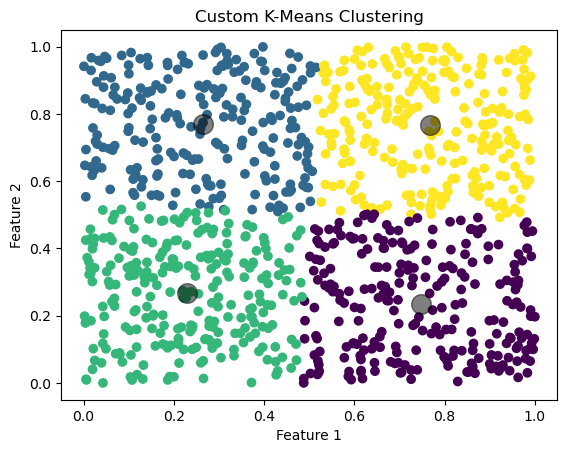

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Generating random data for illustration
np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples, 2)

# Initialize centroids randomly
n_clusters = 4
initial_centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False), :]

def compute_centroids(X, labels, n_clusters):
    centroids = np.zeros((n_clusters, X.shape[1]))
    for k in range(n_clusters):
        centroids[k, :] = np.mean(X[labels == k, :], axis=0)
    return centroids

def find_closest_centroids(X, centroids):
    labels = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i, :] - centroids, axis=1)
        labels[i] = np.argmin(distances)
    return labels

# Run K-Means
centroids = initial_centroids
for i in range(10):  # number of iterations
    labels = find_closest_centroids(X, centroids)
    centroids = compute_centroids(X, labels, n_clusters)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.title('Custom K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Severity vs Visibility:

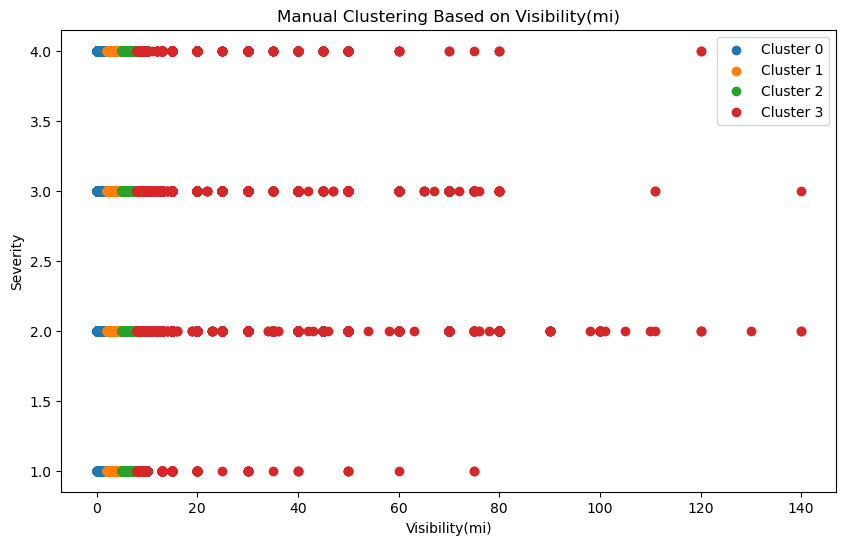

In [76]:
# Load your dataset
df = pd.read_csv('US_Accidents_March23.csv')
# Define visibility thresholds for clustering
thresholds = [2, 5, 8]  # Example thresholds, adjust based on your data analysis

# Assign a cluster based on visibility
def assign_cluster(row):
    for i, threshold in enumerate(thresholds):
        if row['Visibility(mi)'] < threshold:
            return i
    return len(thresholds)

df['Cluster'] = df.apply(assign_cluster, axis=1)

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in range(len(thresholds) + 1):
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['Visibility(mi)'], clustered_data['Severity'], label=f'Cluster {cluster}')

plt.title('Manual Clustering Based on Visibility(mi)')
plt.xlabel('Visibility(mi)')
plt.ylabel('Severity')
plt.legend()
plt.show()

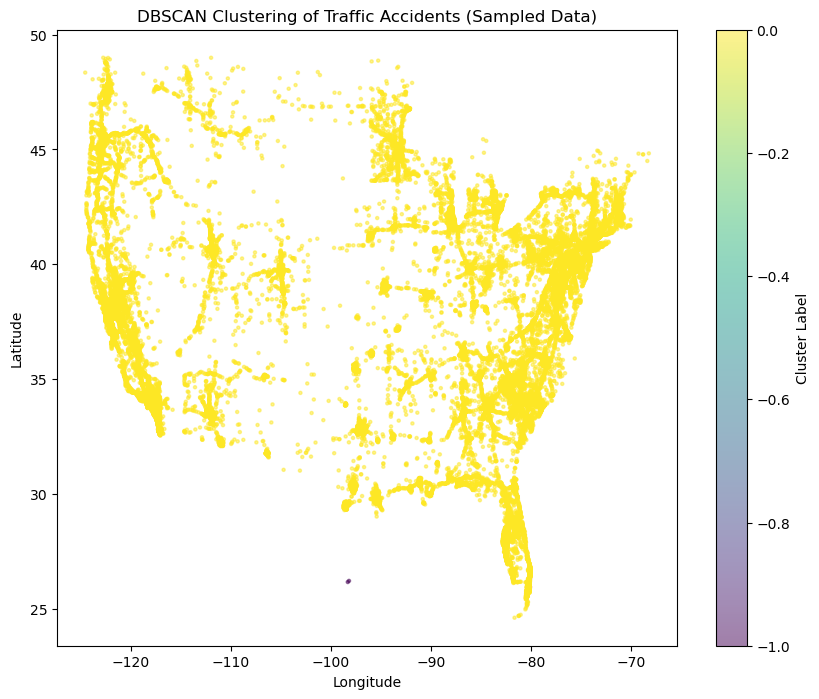

In [78]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv('US_Accidents_March23.csv')

# Sample a fraction of the data, for example, 1%
df_sampled = df.sample(frac=0.01, random_state=42)

# Extract the coordinates for clustering from the sampled data
coords = df_sampled[['Start_Lat', 'Start_Lng']]

# Standardize the features
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# Apply DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5).fit(coords_scaled)  # Adjusted parameters

# Add the cluster labels back to the original dataframe
df_sampled['cluster'] = db.labels_

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_sampled['Start_Lng'], df_sampled['Start_Lat'], c=df_sampled['cluster'], cmap='viridis', s=5, alpha=0.5)
plt.title('DBSCAN Clustering of Traffic Accidents (Sampled Data)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.show()


## Model Training

# Logistic Regression Model

In [79]:
# Defining the model and it's parameters
lr = LogisticRegression(random_state = 42, n_jobs =-1,max_iter = 100)
params = {"solver": ["sag","saga"]}

# Performing Grid Search to find best params
grid = GridSearchCV(lr, params, n_jobs =1,verbose = 0,)
grid.fit(X_train_sample, y_train_sample)

print("Best parameter scores:")
print(grid.best_params_)

# Storing the best Params to be used in training on whole dataset if it's a best model compared to others
best_params["lr"] = grid.best_params_
print(f"Train score: {grid.score(X_train_sample, y_train_sample)}")


Best parameter scores:
{'solver': 'sag'}
Train score: 0.6925


In [80]:
# Observing the data frame on fitted models 
df = (pd.DataFrame(grid.cv_results_,index = ['sag','saga'])).drop(["param_solver"],axis = 1)
df = df.rename_axis('Solver', axis='index')
df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
Solver,,,,,,,,,,,,,
sag,1.041458,0.491039,0.008117,0.004702,{'solver': 'sag'},0.67,0.691875,0.675625,0.689375,0.681250,0.681625,0.008203,1
saga,1.842018,0.251744,0.006590,0.001163,{'solver': 'saga'},0.67,0.691875,0.675625,0.689375,0.680625,0.681500,0.008212,2


Running the best params logistic regression model

In [81]:
print("Best Param scores for Logistic Regression:")
lr = LogisticRegression(**grid.best_params_, random_state = 42,)
lr.fit(X_train_sample, y_train_sample)

# Storing the model trained with best params later used for visualizations
models["Logistic Regression"] = lr


print("Train score:", lr.score(X_train_sample, y_train_sample))
print("Validation score:", lr.score(X_val_sample, y_val_sample))

Best Param scores for Logistic Regression:
Train score: 0.6925
Validation score: 0.6385


Logistic Regression Conf. Matrix on Validation set


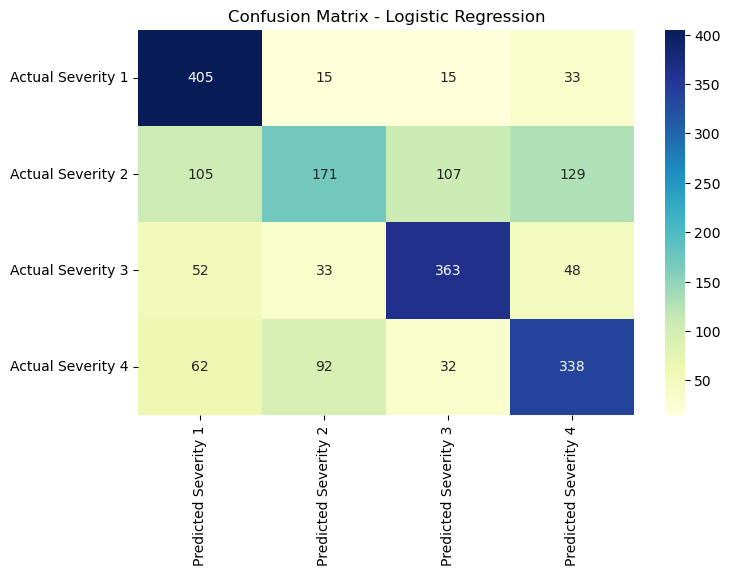

In [82]:
y_pred = lr.predict(X_val_sample)
confmat = confusion_matrix(y_true=y_val_sample, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]

conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [83]:
# Observing the classification report for Logistic Regression
y_pred = lr.predict(X_val_sample)

# Store the respective scores
accuracy["Logistic Regression"] = accuracy_score(y_val_sample,y_pred)
f1["Logistic Regression"] = f1_score(y_val_sample,y_pred,average = 'macro')

# Classification report on train and Val data
print(classification_report(y_train_sample,lr.predict(X_train_sample)))
print(classification_report(y_val_sample,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.89      0.80      2035
           2       0.63      0.38      0.47      1924
           3       0.72      0.77      0.75      2051
           4       0.65      0.71      0.68      1990

    accuracy                           0.69      8000
   macro avg       0.68      0.69      0.68      8000
weighted avg       0.68      0.69      0.68      8000

              precision    recall  f1-score   support

           1       0.65      0.87      0.74       468
           2       0.55      0.33      0.42       512
           3       0.70      0.73      0.72       496
           4       0.62      0.65      0.63       524

    accuracy                           0.64      2000
   macro avg       0.63      0.64      0.63      2000
weighted avg       0.63      0.64      0.62      2000



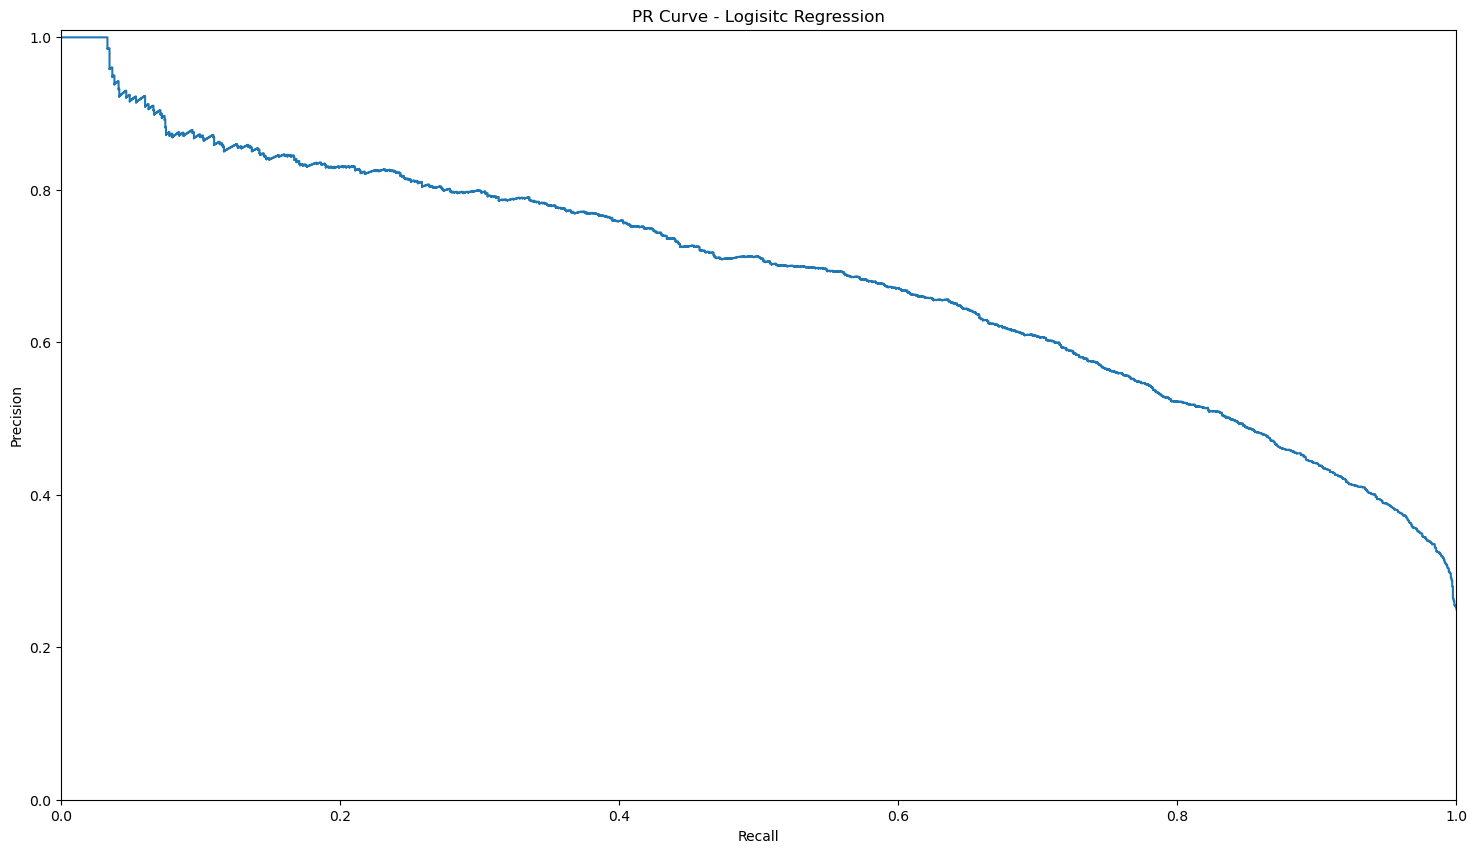

In [84]:
# Creates a 2d array from 1d array of y_val_sample, where each instance represents presence of one severity via 1 and rest are 0's.
# This is necessary since predictions are in 2d format 
# Creating a pr curve tests these arrays i.e. true_y_values and predictions on different 
# thresholds, so binarizing is helpful to make y_val and preds of same size to be compared

Y = label_binarize(y_val_sample, classes=[1, 2, 3, 4])

y_score = lr.predict_proba(X_val_sample)

#Storing the metrics for later viz's
precision["Logistic Regression"], recall["Logistic Regression"], thresholds = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(Y.ravel(), y_score.ravel())

# Plotting the PR Curve
plt.figure(figsize=(18, 10))
plt.step(recall["Logistic Regression"], precision["Logistic Regression"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Logisitc Regression")
plt.show()
# The curve is better the one which is near to right hand corner [1,1]

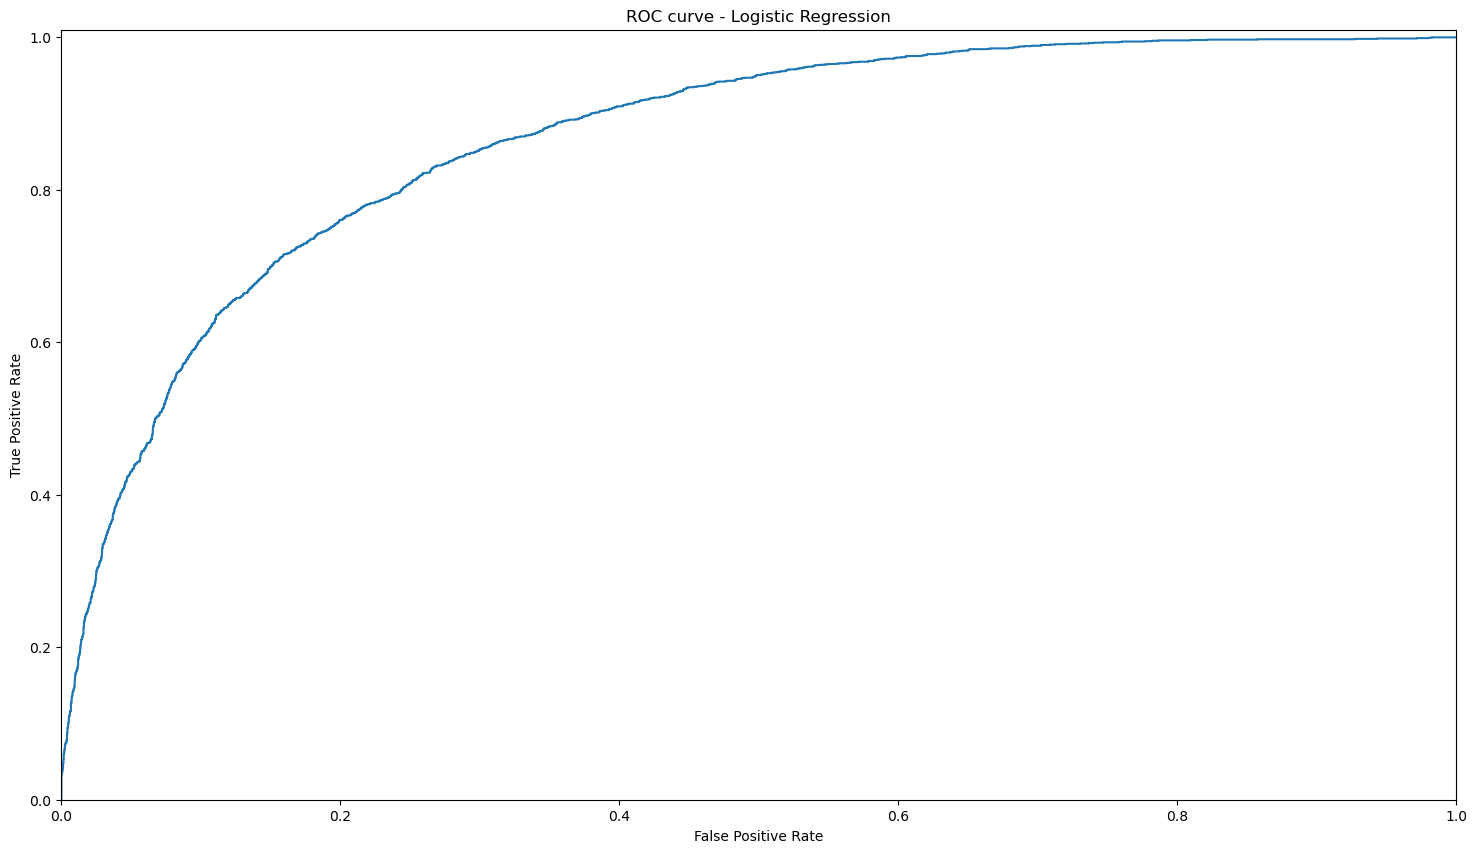

In [85]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Logistic Regression"], tpr["Logistic Regression"], where="post")

plt.title("ROC curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()
# The curve is better the one which is near to left hand corner [0,1]


# Decision Tree Model

In [86]:
dtc = DecisionTreeClassifier(random_state=42)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]

grid = GridSearchCV(dtc, parameters, verbose = 0, n_jobs=-1)
grid.fit(X_train_sample, y_train_sample)

print("Best param scores for Decision Tree Classifier:")
print(grid.best_params_)
best_params["dtc"] = grid.best_params_

print("Train score:", grid.score(X_train_sample, y_train_sample))
print("Validation score:", grid.score(X_val_sample, y_val_sample))

Best param scores for Decision Tree Classifier:
{'criterion': 'gini', 'max_depth': 10}
Train score: 0.83525
Validation score: 0.7115


In [87]:
pd.DataFrame(grid.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.323421,0.045227,0.018533,0.007526,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.718125,0.725625,0.711250,0.733125,0.723125,0.722250,0.007327,1
4,0.167814,0.020674,0.009923,0.001853,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.723750,0.724375,0.700000,0.723750,0.718750,0.718125,0.009287,2
0,0.188569,0.051386,0.014859,0.006859,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.716250,0.720000,0.709375,0.721250,0.718125,0.717000,0.004172,3
5,0.288446,0.013189,0.010023,0.000893,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.711250,0.726250,0.693750,0.733125,0.715000,0.715875,0.013542,4
2,0.376535,0.071347,0.009292,0.001218,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.690625,0.701875,0.681875,0.700625,0.696875,0.694375,0.007374,5
6,0.357453,0.018090,0.009122,0.000799,entropy,15,"{'criterion': 'entropy', 'max_depth': 15}",0.686250,0.716875,0.675000,0.693750,0.699375,0.694250,0.013950,6
3,0.395977,0.051707,0.010790,0.002568,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.660000,0.672500,0.666250,0.671250,0.680625,0.670125,0.006851,7
7,0.370115,0.012804,0.010430,0.000806,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.646250,0.685625,0.670000,0.663750,0.670000,0.667125,0.012696,8


In [88]:
print("Best Param scores for Decision Tree Classifier:")
dtc = DecisionTreeClassifier(**grid.best_params_, random_state = 42)

dtc.fit(X_train_sample, y_train_sample)

# Storing the model trained with best params later used for visualizations
models["Decision Tree"] = dtc

print("Train score:", dtc.score(X_train_sample, y_train_sample))
print("Validation score:", dtc.score(X_val_sample, y_val_sample))

Best Param scores for Decision Tree Classifier:
Train score: 0.83525
Validation score: 0.7115


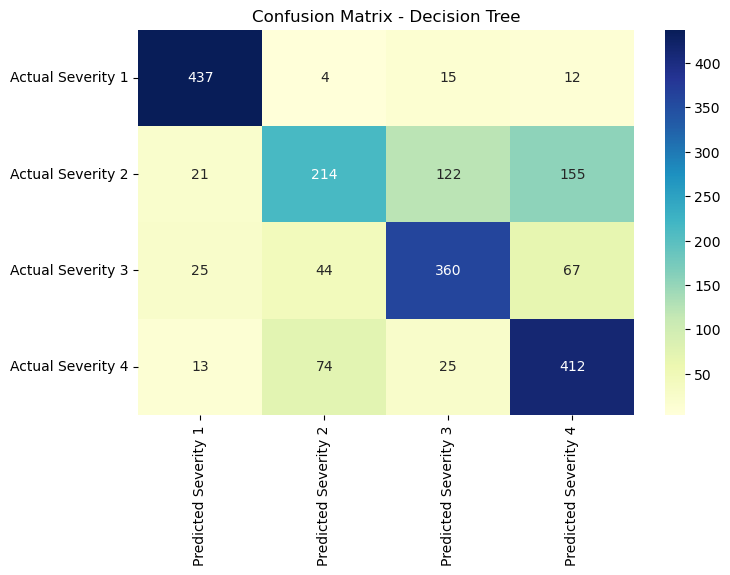

In [89]:
y_pred = dtc.predict(X_val_sample)
confmat = confusion_matrix(y_true=y_val_sample, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]

conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [90]:
y_pred = dtc.predict(X_val_sample)

accuracy["Decision Tree"] = accuracy_score(y_val_sample, y_pred)
f1["Decision Tree"] = f1_score(y_val_sample, y_pred, average="macro")

print(classification_report(y_train_sample, dtc.predict(X_train_sample)))
print(classification_report(y_val_sample, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.96      0.93      2035
           2       0.86      0.61      0.71      1924
           3       0.82      0.87      0.84      2051
           4       0.77      0.90      0.83      1990

    accuracy                           0.84      8000
   macro avg       0.84      0.83      0.83      8000
weighted avg       0.84      0.84      0.83      8000

              precision    recall  f1-score   support

           1       0.88      0.93      0.91       468
           2       0.64      0.42      0.50       512
           3       0.69      0.73      0.71       496
           4       0.64      0.79      0.70       524

    accuracy                           0.71      2000
   macro avg       0.71      0.72      0.71      2000
weighted avg       0.71      0.71      0.70      2000



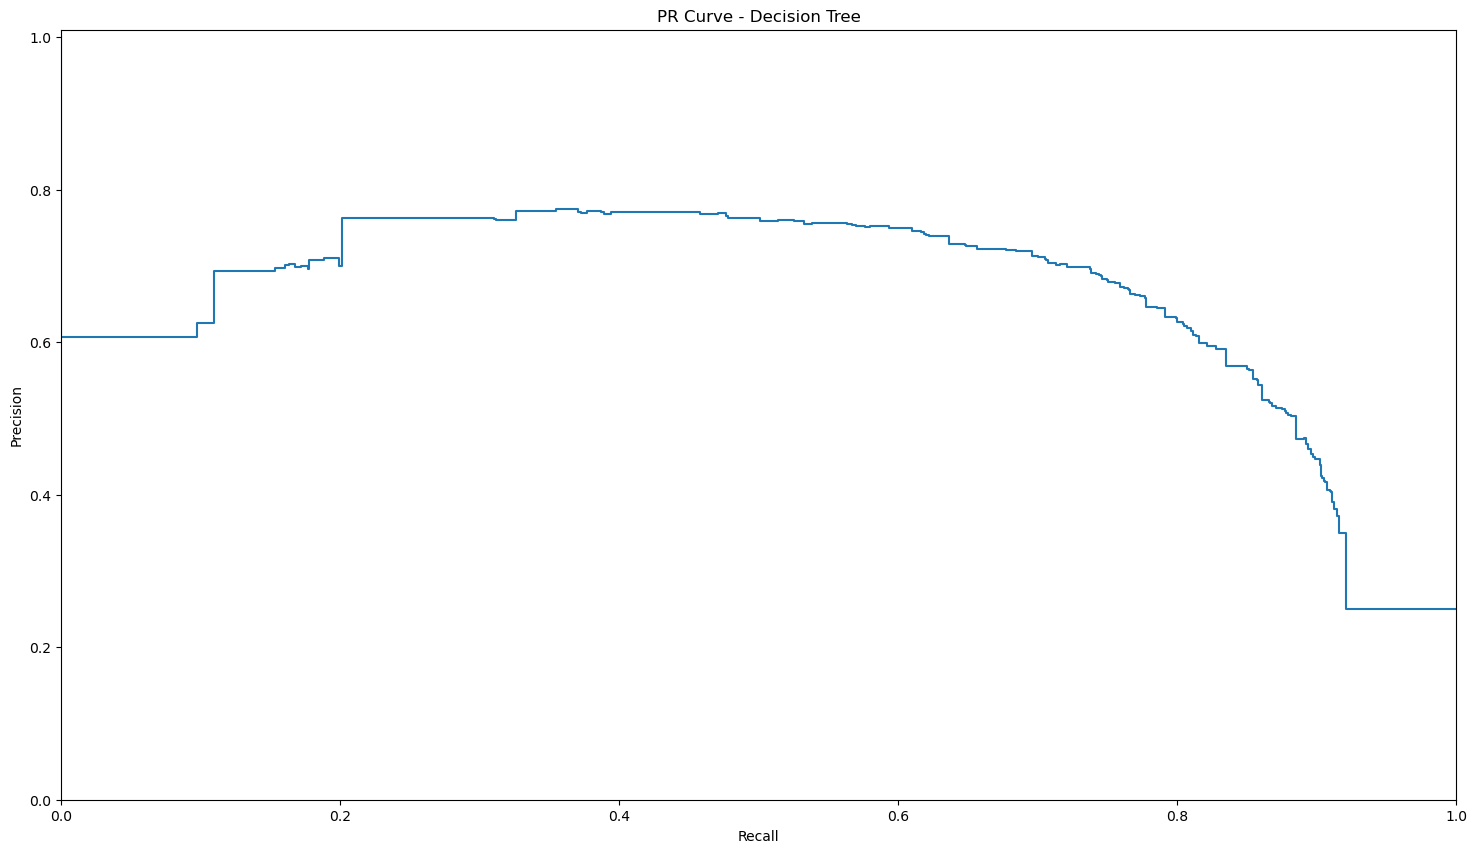

In [91]:
Y = label_binarize(y_val_sample, classes=[1, 2, 3, 4])

y_score = dtc.predict_proba(X_val_sample)

precision["Decision Tree"], recall["Decision Tree"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Decision Tree"], tpr["Decision Tree"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Decision Tree"], precision["Decision Tree"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Decision Tree")
plt.show()

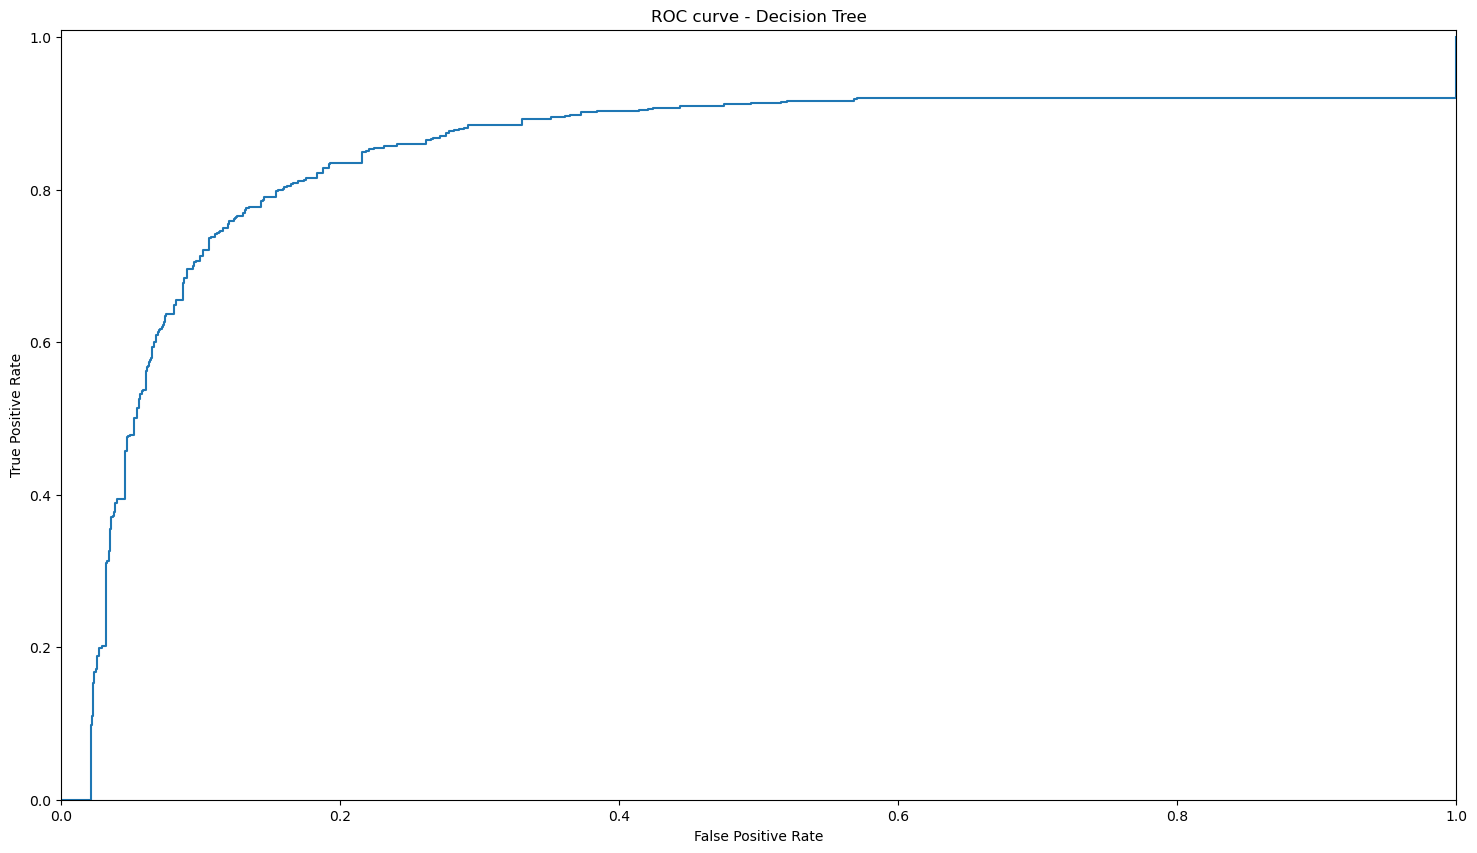

In [92]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Decision Tree"], tpr["Decision Tree"], where="post")

plt.title("ROC curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

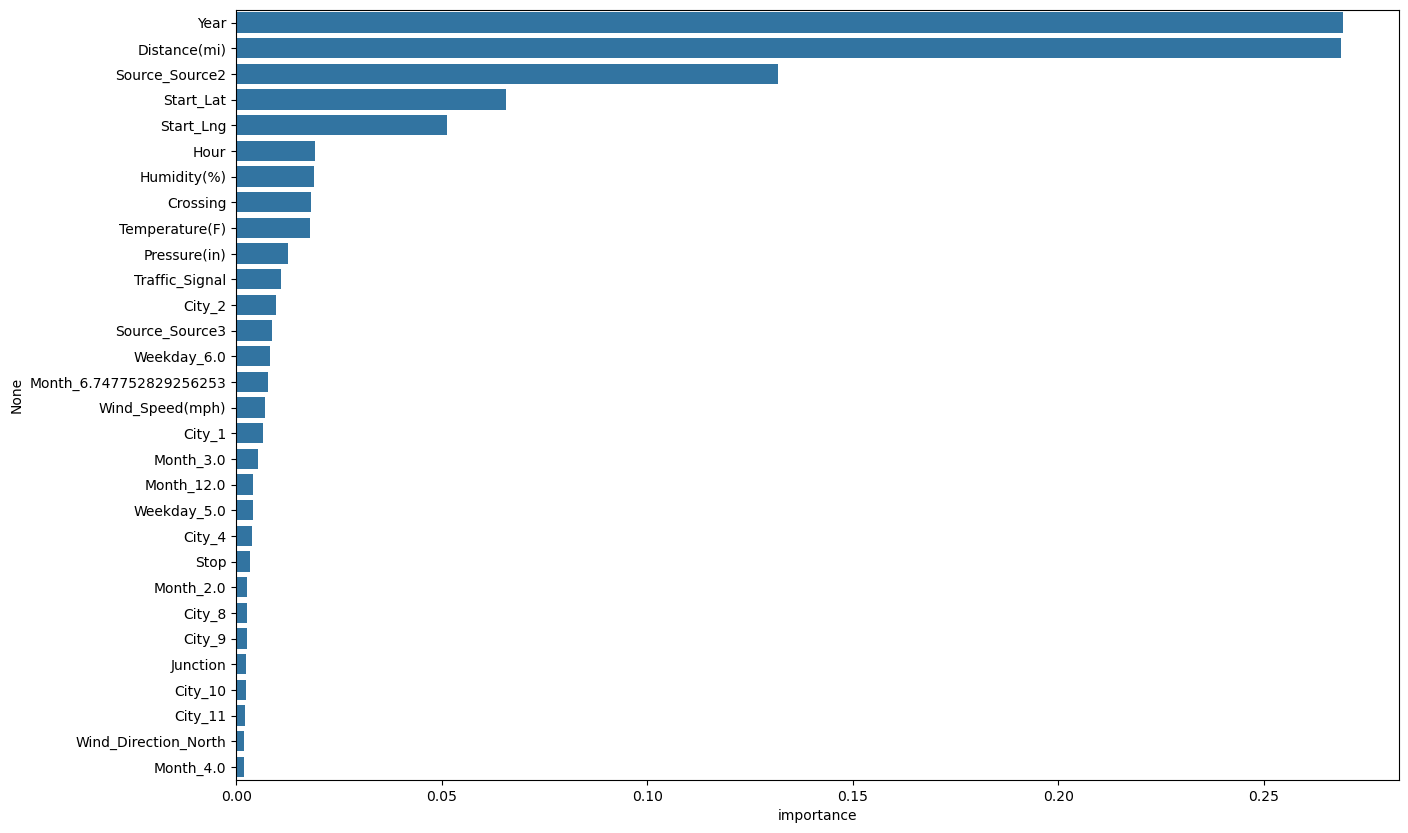

In [93]:
importances = pd.DataFrame(np.zeros((X_train_sample.shape[1], 1)), columns=["importance"], index=X_train_sample.columns)

importances.iloc[:,0] = dtc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

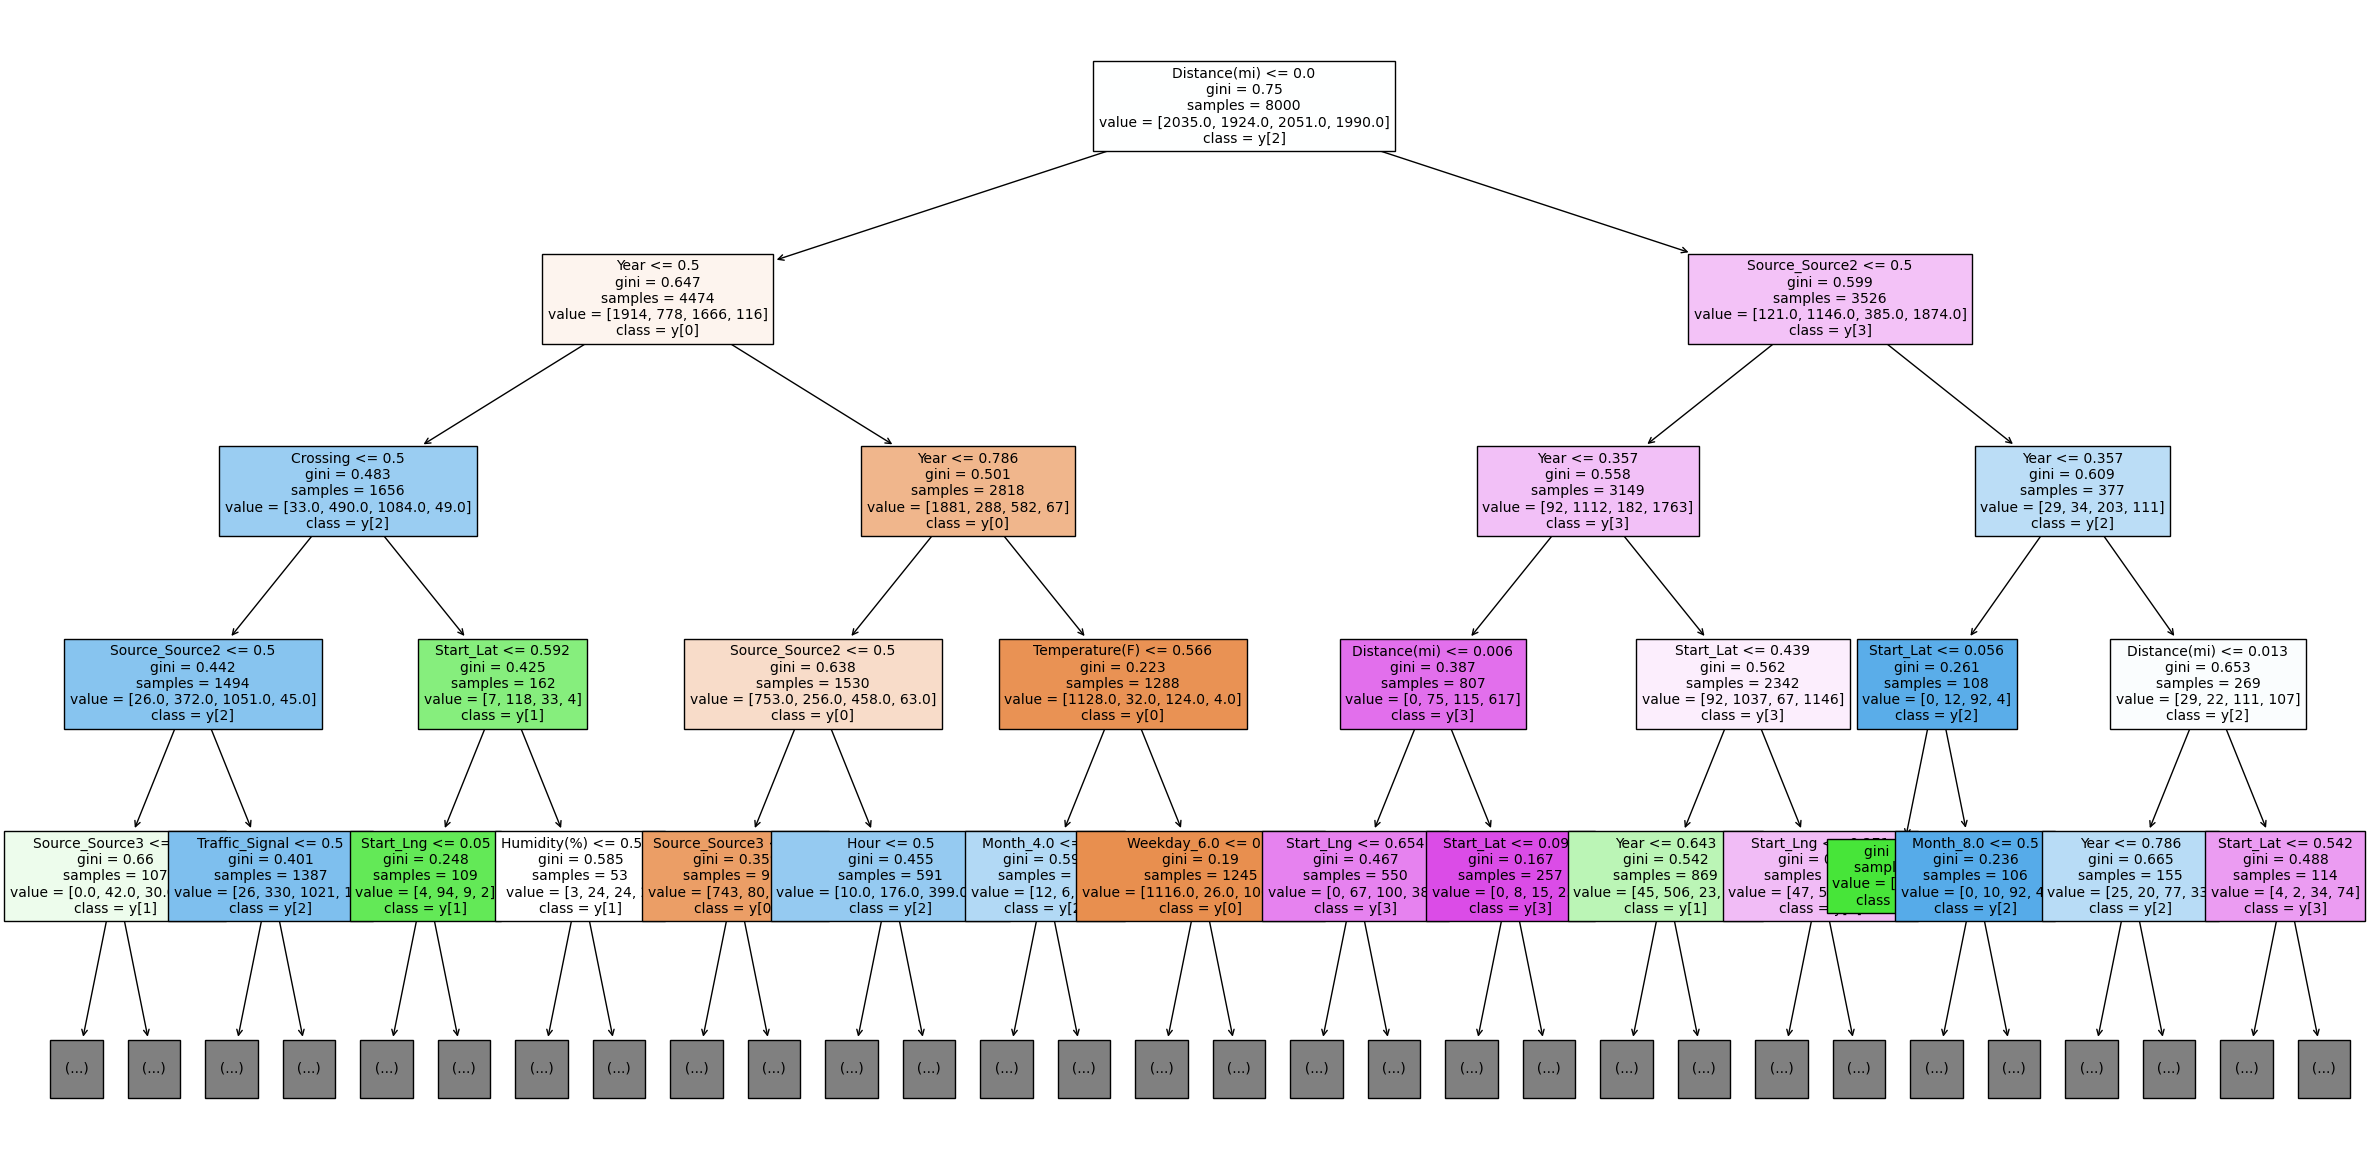

In [94]:
fig, ax = plt.subplots(figsize=(30, 15))
plot_tree(dtc, max_depth=4, fontsize=10, feature_names=X_train_sample.columns.to_list(), class_names = True, filled=True)
plt.show()

# Random Forest Classifier

In [95]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]

grid = GridSearchCV(rfc, parameters, verbose = 0, n_jobs=-1)
grid.fit(X_train_sample, y_train_sample)

print("Best parameters scores:")
print(grid.best_params_)
best_params["rfc"] = grid.best_params_


print("Train score:", grid.score(X_train_sample, y_train_sample))
print("Validation score:", grid.score(X_val_sample, y_val_sample))

Best parameters scores:
{'max_depth': 30, 'n_estimators': 200}
Train score: 0.999875
Validation score: 0.733


In [96]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,5.847835,0.739834,0.941368,0.472538,30,200,"{'max_depth': 30, 'n_estimators': 200}",0.757500,0.757500,0.756250,0.773125,0.759375,0.760750,0.006267,1
15,14.126543,3.681112,0.843437,0.461582,30,500,"{'max_depth': 30, 'n_estimators': 500}",0.751875,0.758125,0.756250,0.769375,0.758125,0.758750,0.005783,2
13,3.129950,0.222265,0.736112,0.108218,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.759375,0.752500,0.750000,0.763750,0.756250,0.756375,0.004880,3
11,13.041393,0.994938,0.928196,0.120439,15,500,"{'max_depth': 15, 'n_estimators': 500}",0.755000,0.752500,0.757500,0.765625,0.750625,0.756250,0.005229,4
12,1.643442,0.140019,0.616569,0.168679,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.751875,0.758125,0.747500,0.768125,0.752500,0.755625,0.007104,5
9,2.587640,0.279585,0.585128,0.273959,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.747500,0.755625,0.751250,0.770625,0.752500,0.755500,0.007998,6
10,4.918229,0.605670,0.867244,0.432578,15,200,"{'max_depth': 15, 'n_estimators': 200}",0.752500,0.751875,0.748125,0.770625,0.750625,0.754750,0.008078,7
8,1.517430,0.190263,0.600341,0.200647,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.743750,0.756250,0.744375,0.768125,0.750625,0.752625,0.008991,8
7,9.781617,0.899225,0.913623,0.271641,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.735625,0.743125,0.736875,0.751875,0.741875,0.741875,0.005755,9
6,4.584379,0.095275,0.776343,0.324828,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.731250,0.740625,0.734375,0.751250,0.741875,0.739875,0.006908,10


In [97]:
print("Best Param scores for Random Forest Classifier:")
rfc = RandomForestClassifier(**grid.best_params_, random_state = 42)

rfc.fit(X_train_sample, y_train_sample)
# Storing the model trained with best params later used for visualizations
models["Random Forest"] = rfc

print("Train Score: ", rfc.score(X_train_sample, y_train_sample))
print("Validation Score: ", rfc.score(X_val_sample, y_val_sample))

Best Param scores for Random Forest Classifier:


Train Score:  0.999875
Validation Score:  0.733


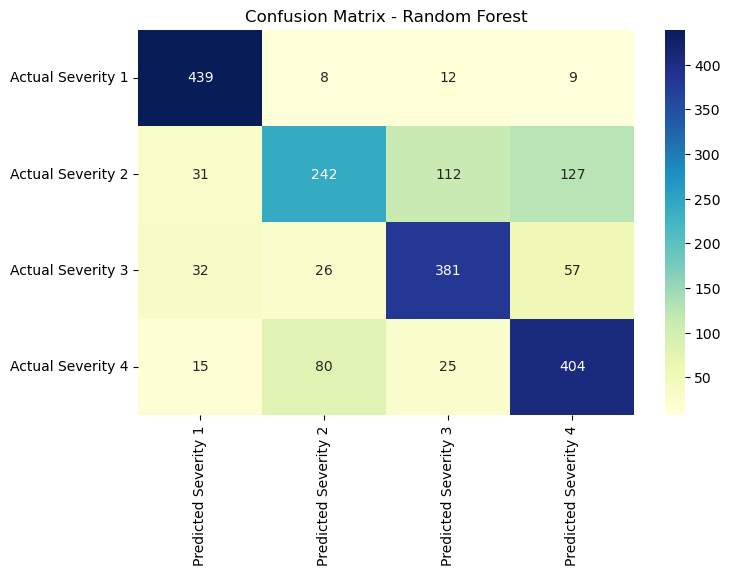

In [98]:
y_pred = rfc.predict(X_val_sample)
confmat = confusion_matrix(y_true=y_val_sample, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]

conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [99]:
y_pred = rfc.predict(X_val_sample)

accuracy["Random Forest"] = accuracy_score(y_val_sample, y_pred)
f1["Random Forest"] = f1_score(y_val_sample, y_pred, average="macro")

print(classification_report(y_train_sample, rfc.predict(X_train_sample)))
print(classification_report(y_val_sample, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2035
           2       1.00      1.00      1.00      1924
           3       1.00      1.00      1.00      2051
           4       1.00      1.00      1.00      1990

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           1       0.85      0.94      0.89       468
           2       0.68      0.47      0.56       512
           3       0.72      0.77      0.74       496
           4       0.68      0.77      0.72       524

    accuracy                           0.73      2000
   macro avg       0.73      0.74      0.73      2000
weighted avg       0.73      0.73      0.72      2000



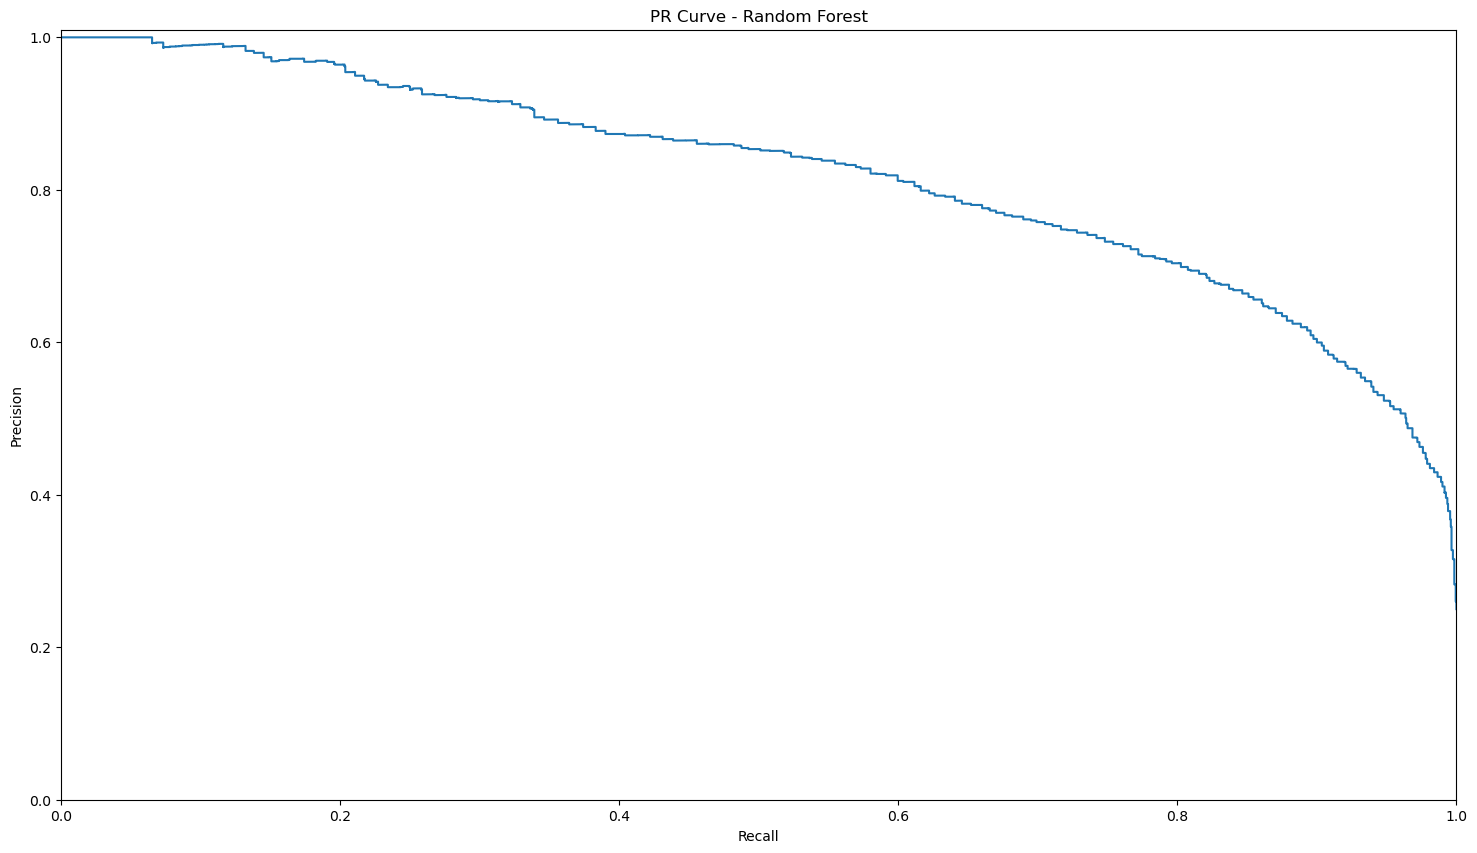

In [100]:

Y = label_binarize(y_val_sample, classes=[1, 2, 3, 4])

y_score = rfc.predict_proba(X_val_sample)

precision["Random Forest"], recall["Random Forest"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Random Forest"], precision["Random Forest"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Random Forest")
plt.show()

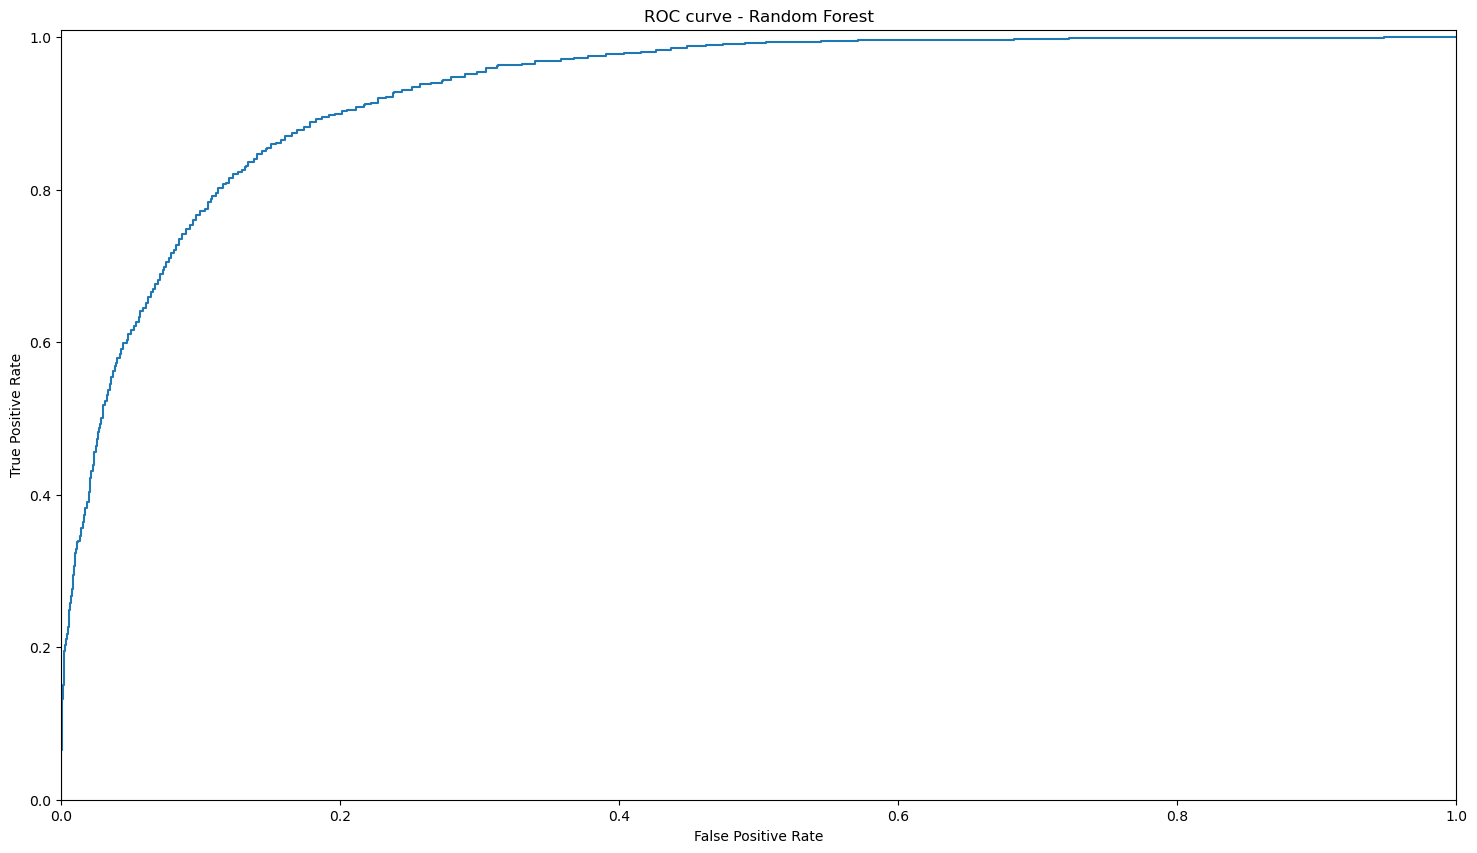

In [101]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post")

plt.title("ROC curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

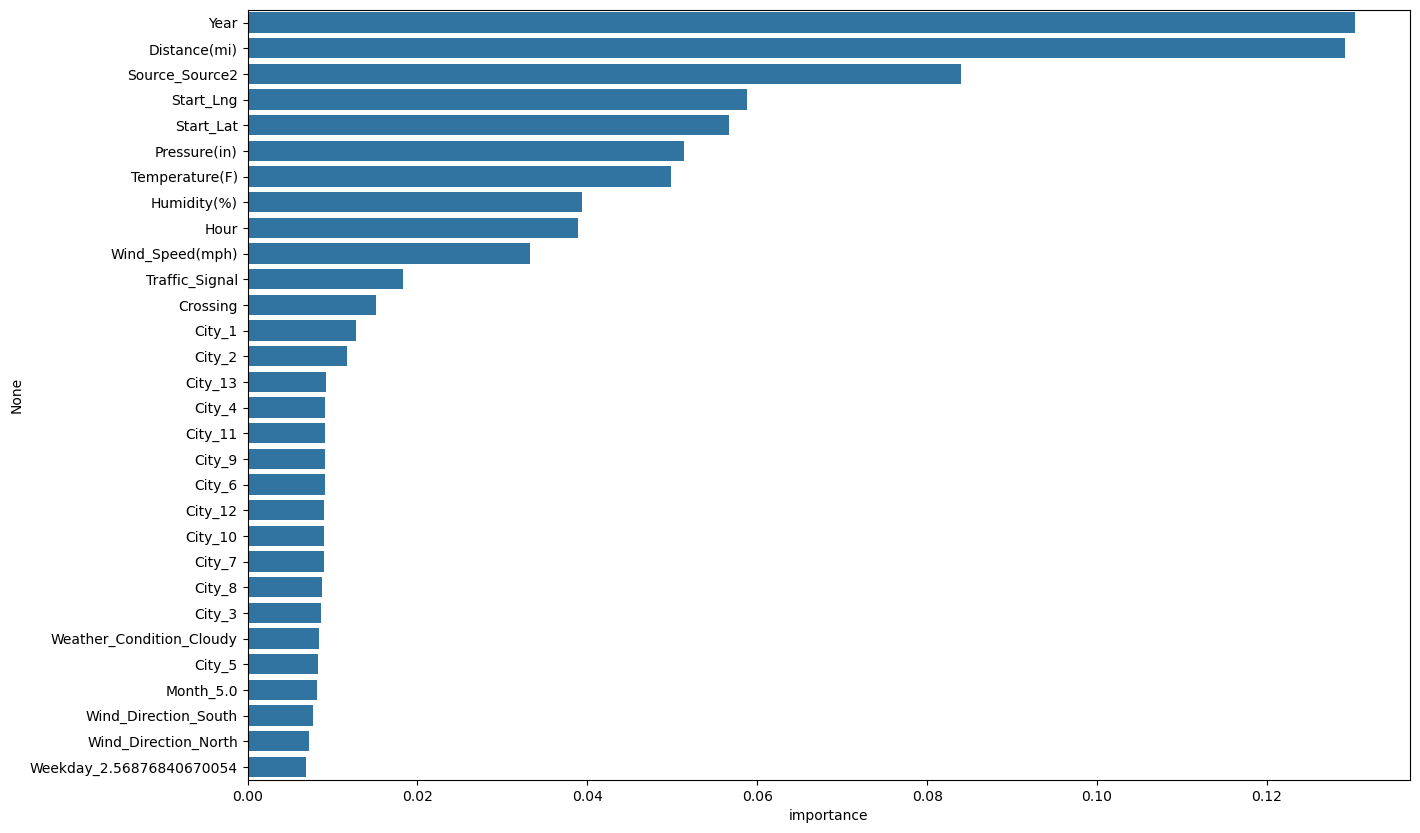

In [102]:
importances = pd.DataFrame(np.zeros((X_train_sample.shape[1], 1)), columns=["importance"], index=X_train_sample.columns)

importances.iloc[:,0] = rfc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

# Naive Bayes

In [103]:
mnb = MultinomialNB()
mnb.fit(X_train_sample, y_train_sample)

# Storing the model trained with best params later used for visualizations
models["Multinomial Naive Bayes"] = mnb

print("Train score:", mnb.score(X_train_sample, y_train_sample))
print("Validation score:", mnb.score(X_val_sample, y_val_sample))

Train score: 0.611375
Validation score: 0.5765


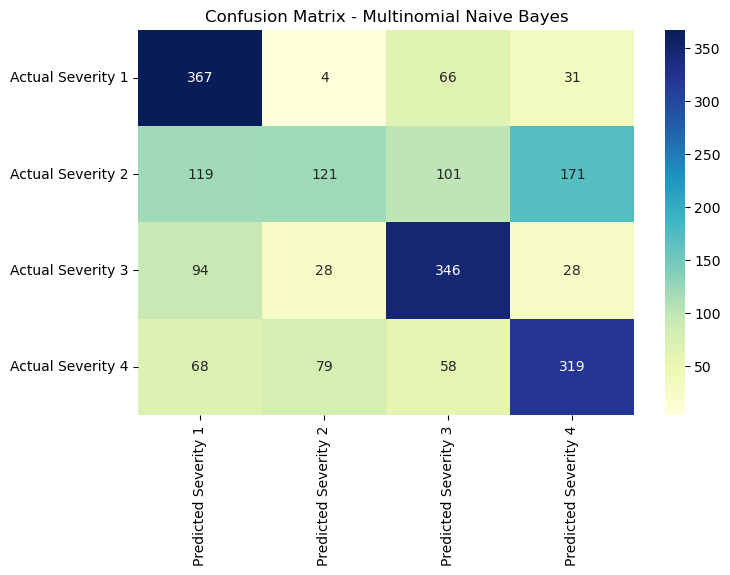

In [104]:
y_pred = mnb.predict(X_val_sample)
confmat = confusion_matrix(y_true=y_val_sample, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]

conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.show()

In [105]:
y_pred = mnb.predict(X_val_sample)

accuracy["Multinomial Naive Bayes"] = accuracy_score(y_val_sample, y_pred)
f1["Multinomial Naive Bayes"] = f1_score(y_val_sample, y_pred, average="macro")

print(classification_report(y_train_sample, mnb.predict(X_train_sample)))
print(classification_report(y_val_sample, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.80      0.69      2035
           2       0.62      0.26      0.37      1924
           3       0.62      0.73      0.67      2051
           4       0.60      0.63      0.62      1990

    accuracy                           0.61      8000
   macro avg       0.61      0.61      0.59      8000
weighted avg       0.61      0.61      0.59      8000

              precision    recall  f1-score   support

           1       0.57      0.78      0.66       468
           2       0.52      0.24      0.33       512
           3       0.61      0.70      0.65       496
           4       0.58      0.61      0.59       524

    accuracy                           0.58      2000
   macro avg       0.57      0.58      0.56      2000
weighted avg       0.57      0.58      0.55      2000



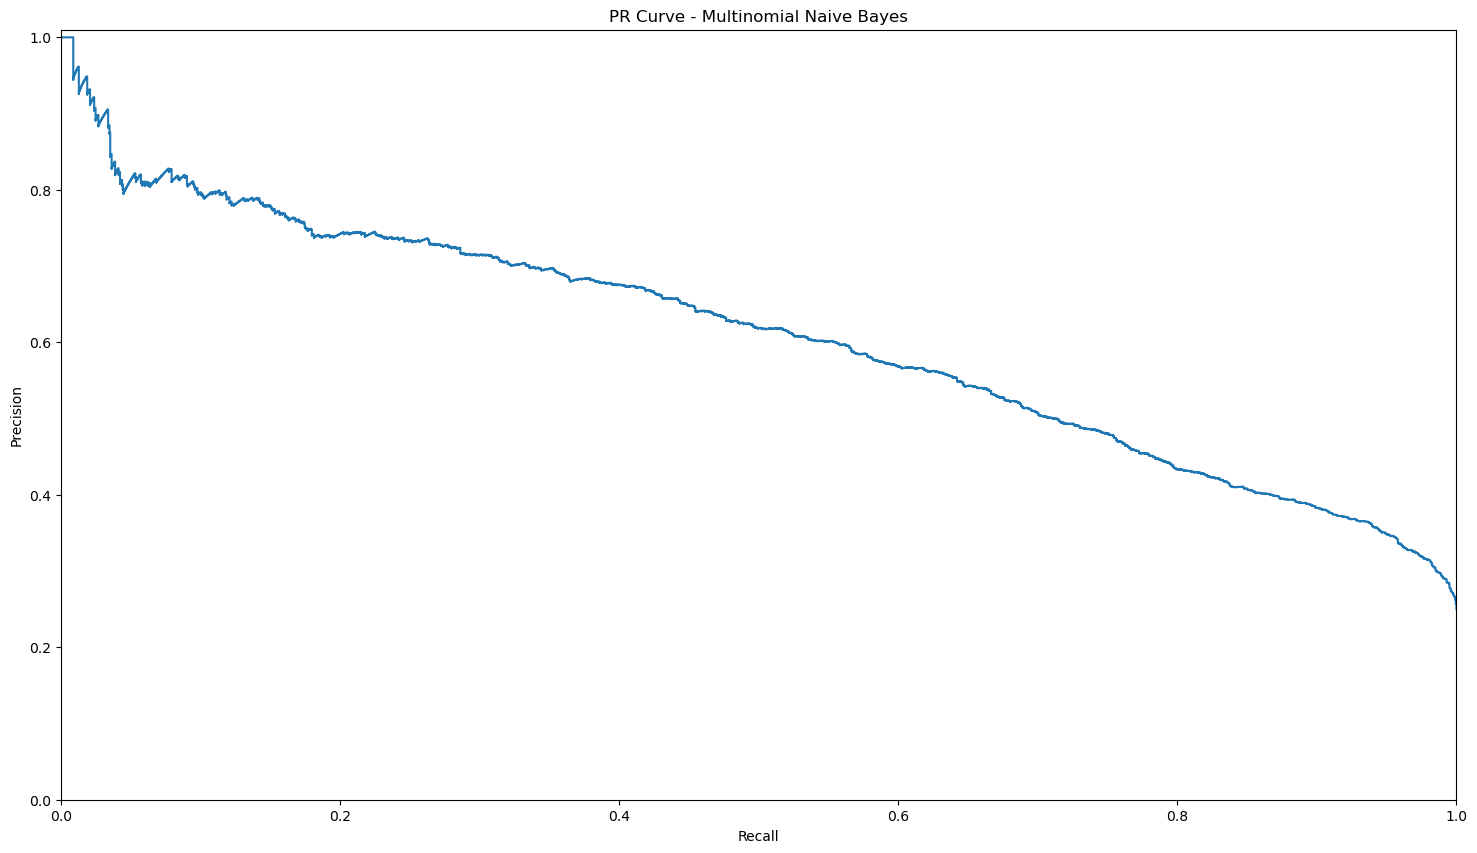

In [106]:
Y = label_binarize(y_val_sample, classes=[1, 2, 3, 4])

y_score = mnb.predict_proba(X_val_sample)

precision["Multinomial Naive Bayes"], recall["Multinomial Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Multinomial Naive Bayes"], tpr["Multinomial Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Multinomial Naive Bayes"], precision["Multinomial Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Multinomial Naive Bayes")
plt.show()

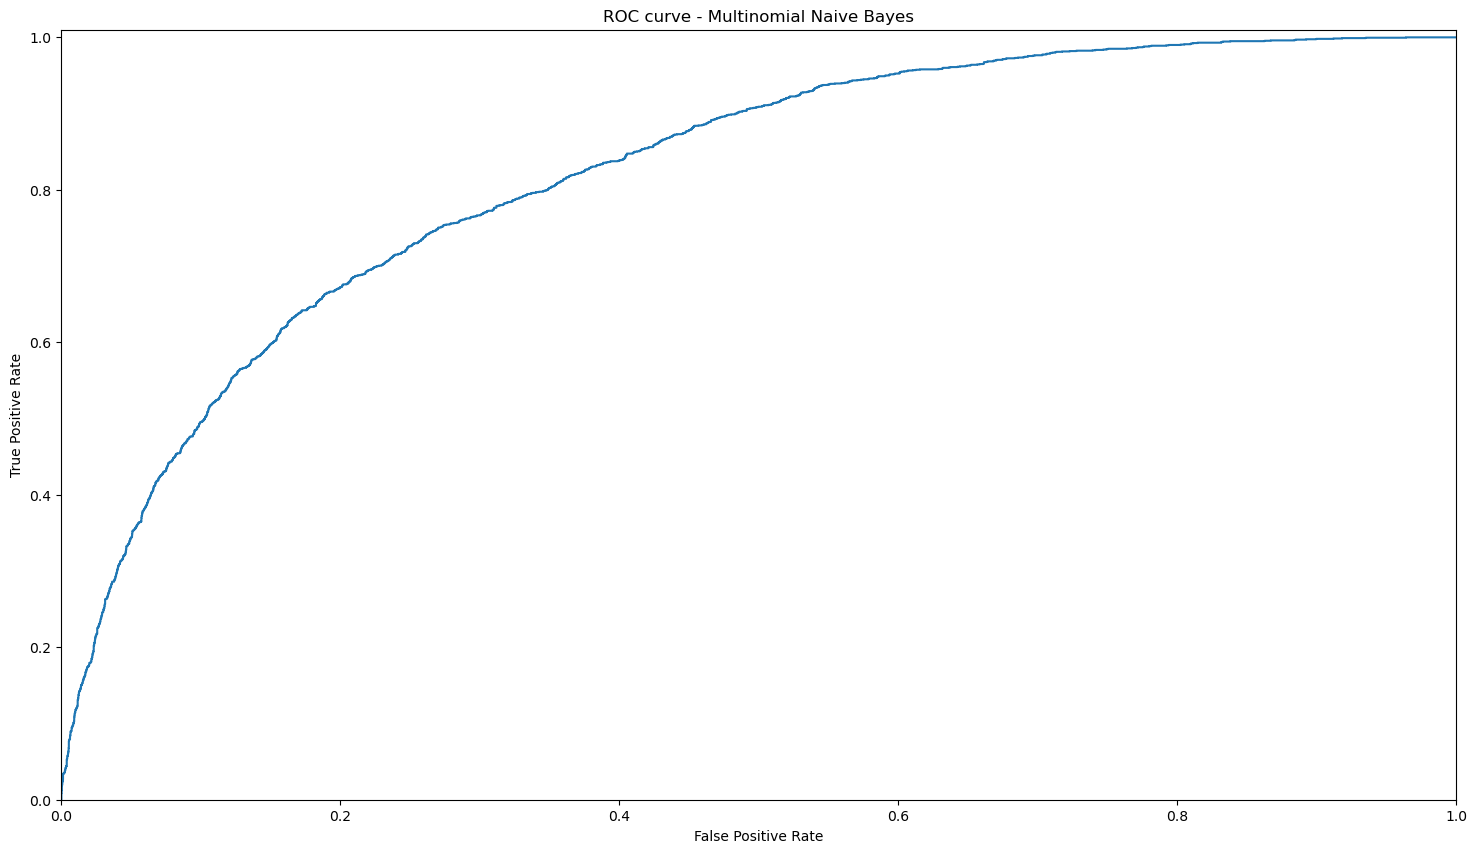

In [107]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Multinomial Naive Bayes"], tpr["Multinomial Naive Bayes"], where="post")

plt.title("ROC curve - Multinomial Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

# CatBoost classifier

In [113]:
# Install catboost package
%pip install catboost

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define CatBoost parameters for GridSearch
catboost_params = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [4, 6, 10]
}

# Initialize CatBoost Classifier
catboost = CatBoostClassifier(random_state=42, verbose=0)  # Set verbose to 0 for silent training

# GridSearchCV for CatBoost
grid_catboost = GridSearchCV(catboost, catboost_params, verbose=0, n_jobs=-1)
grid_catboost.fit(X_train_sample, y_train_sample)

# Print the best parameters and training score for CatBoost
print("Best parameters for CatBoost:")
print(grid_catboost.best_params_)
print("Train score for CatBoost: ", grid_catboost.score(X_train_sample, y_train_sample))


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Best parameters for CatBoost:
{'depth': 6, 'iterations': 300, 'learning_rate': 0.1}
Train score for CatBoost:  0.847


In [114]:
from catboost import CatBoostClassifier

print("Best Param scores for CatBoost:")
cat_best = CatBoostClassifier(**grid_catboost.best_params_, random_state=42, verbose=0)

cat_best.fit(X_train_sample, y_train_sample)
# Storing the model trained with best params for later use in visualizations
models["CatBoost Classifier"] = cat_best

print("Train Score: ", cat_best.score(X_train_sample, y_train_sample))
print("Validation Score: ", cat_best.score(X_val_sample, y_val_sample))


Best Param scores for CatBoost:
Train Score:  0.847
Validation Score:  0.7575


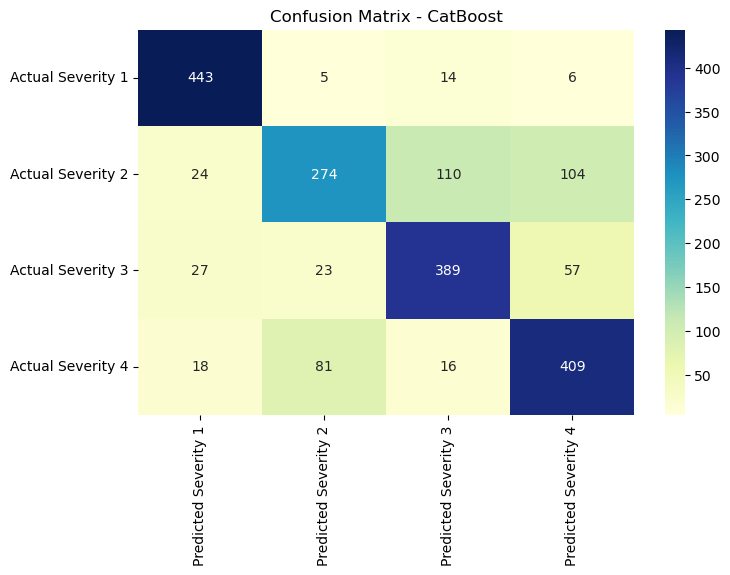

In [116]:
# Prediction using the CatBoost model
y_pred_cat = cat_best.predict(X_val_sample)

# Generate the confusion matrix
confmat_cat = confusion_matrix(y_true=y_val_sample, y_pred=y_pred_cat)

# Define labels for the confusion matrix
index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]

# Create DataFrame for confusion matrix
conf_matrix_cat = pd.DataFrame(data=confmat_cat, columns=columns, index=index)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_cat, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - CatBoost")
plt.show()

In [118]:
# Prediction using the CatBoost model
y_pred_cat = cat_best.predict(X_val_sample)

# Calculate accuracy and F1 score for CatBoost
accuracy["CatBoost"] = accuracy_score(y_val_sample, y_pred_cat)
f1["CatBoost"] = f1_score(y_val_sample, y_pred_cat, average="macro")

# Display classification reports
print("Classification Report for CatBoost on Training Data:")
print(classification_report(y_train_sample, cat_best.predict(X_train_sample)))

print("Classification Report for CatBoost on Validation Data:")
print(classification_report(y_val_sample, y_pred_cat))

Classification Report for CatBoost on Training Data:
              precision    recall  f1-score   support

           1       0.90      0.97      0.94      2035
           2       0.88      0.65      0.75      1924
           3       0.80      0.86      0.83      2051
           4       0.82      0.89      0.85      1990

    accuracy                           0.85      8000
   macro avg       0.85      0.84      0.84      8000
weighted avg       0.85      0.85      0.84      8000

Classification Report for CatBoost on Validation Data:
              precision    recall  f1-score   support

           1       0.87      0.95      0.90       468
           2       0.72      0.54      0.61       512
           3       0.74      0.78      0.76       496
           4       0.71      0.78      0.74       524

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.75      2000
weighted avg       0.75      0.76      0.75      2000



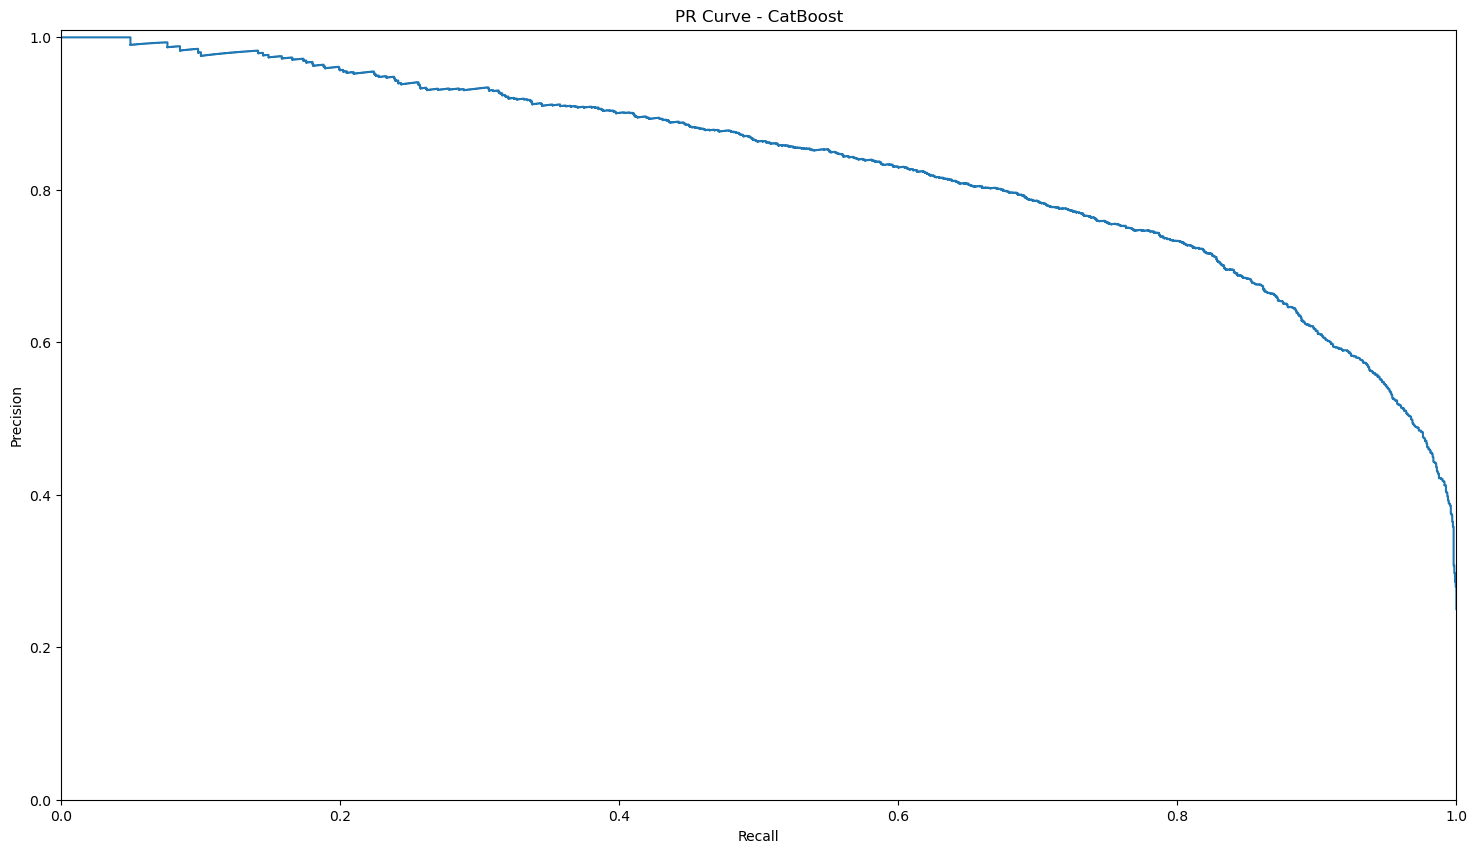

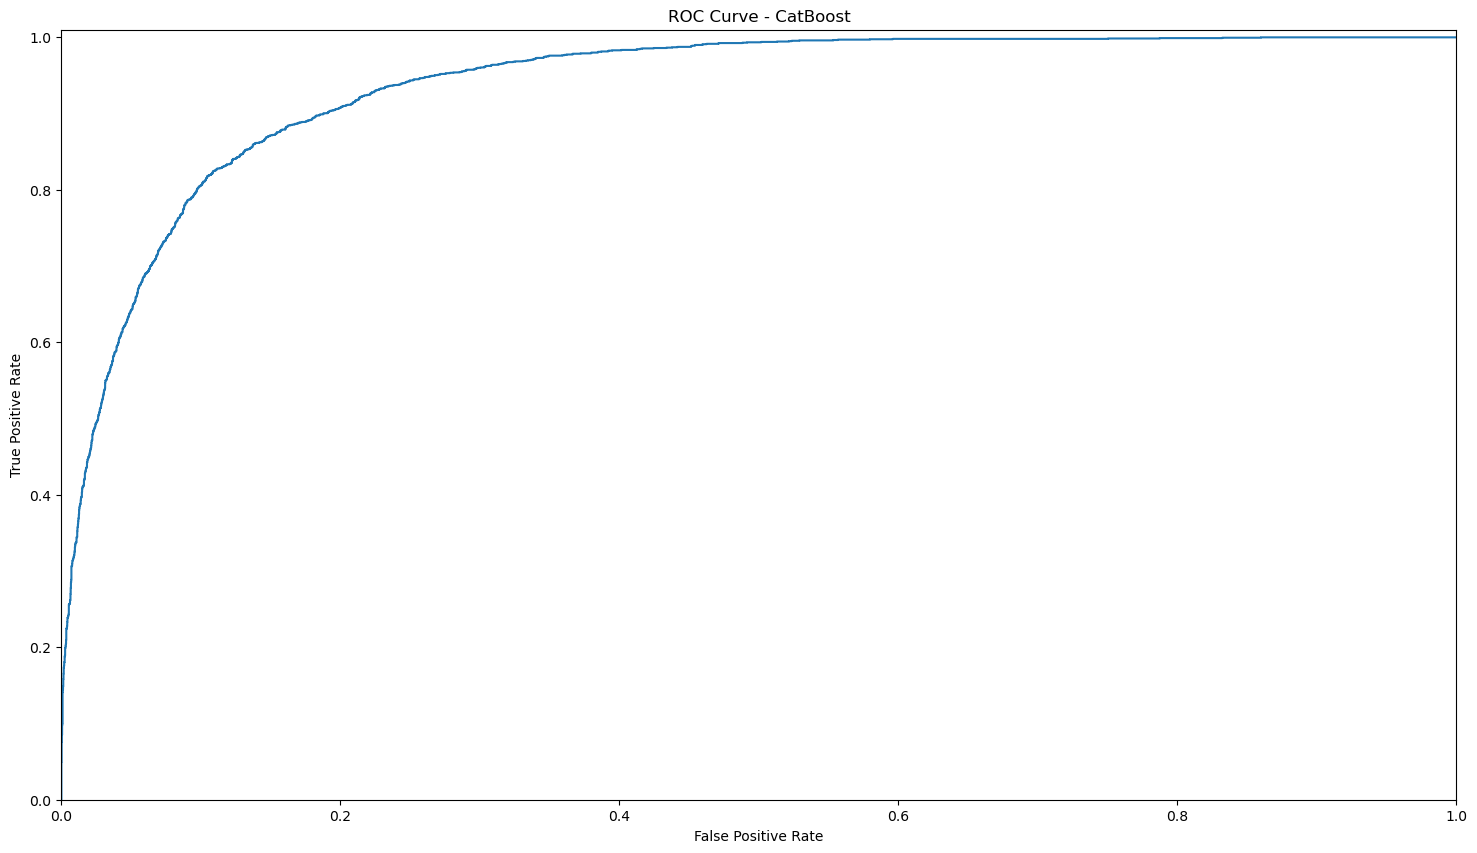

In [120]:
# Binarize the output for multiclass
Y = label_binarize(y_val_sample, classes=[1, 2, 3, 4])

# Get the probability scores from CatBoost
y_score_cat = cat_best.predict_proba(X_val_sample)

# Compute Precision-Recall and ROC metrics for CatBoost
precision["CatBoost"], recall["CatBoost"], _ = precision_recall_curve(Y.ravel(), y_score_cat.ravel())
fpr["CatBoost"], tpr["CatBoost"], _ = roc_curve(Y.ravel(), y_score_cat.ravel())

# Plot the Precision-Recall Curve
plt.figure(figsize=(18, 10))
plt.step(recall["CatBoost"], precision["CatBoost"], where="post")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - CatBoost")
plt.show()

# Plot the ROC Curve
plt.figure(figsize=(18, 10))
plt.step(fpr["CatBoost"], tpr["CatBoost"], where="post")
plt.title("ROC Curve - CatBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

# AdaBoost classifier

In [122]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define AdaBoost parameters
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]  # Updated parameter name
}

# Initialize AdaBoost Classifier
ada = AdaBoostClassifier(random_state=42)

# GridSearchCV for AdaBoost
grid_ada = GridSearchCV(ada, ada_params, verbose=0, n_jobs=-1)
grid_ada.fit(X_train_sample, y_train_sample)

# Print the best parameters and training score for AdaBoost
print("Best parameters for AdaBoost:")
print(grid_ada.best_params_)
print("Train score for AdaBoost: ", grid_ada.score(X_train_sample, y_train_sample))


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost:
{'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.1, 'n_estimators': 100}
Train score for AdaBoost:  0.715375


In [124]:
print("Best Param scores for AdaBoost:")
ada_best = AdaBoostClassifier(**grid_ada.best_params_, random_state=42)

ada_best.fit(X_train_sample, y_train_sample)
# Storing the model trained with best params for later use in visualizations
models["AdaBoost Classifier"] = ada_best

print("Train Score: ", ada_best.score(X_train_sample, y_train_sample))
print("Validation Score: ", ada_best.score(X_val_sample, y_val_sample))


Best Param scores for AdaBoost:


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train Score:  0.715375
Validation Score:  0.6855


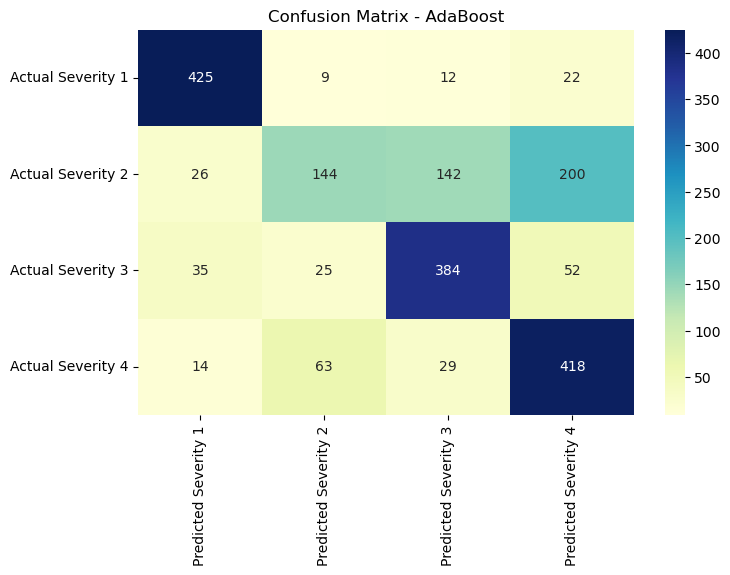

In [125]:
# Prediction using the AdaBoost model
y_pred_ada = ada_best.predict(X_val_sample)

# Generate the confusion matrix
confmat_ada = confusion_matrix(y_true=y_val_sample, y_pred=y_pred_ada)

# Define labels for the confusion matrix
index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]

# Create DataFrame for confusion matrix
conf_matrix_ada = pd.DataFrame(data=confmat_ada, columns=columns, index=index)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_ada, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - AdaBoost")
plt.show()


In [126]:
# y_pred = ada_best.predict(X_val_sample)

# accuracy["ADB"] = accuracy_score(y_val_encoded, y_pred)
# f1["ADB"] = f1_score(y_val_encoded, y_pred, average="macro")

# # Classification Report
# print(classification_report(y_train_encoded, ada_best.predict(X_train_sample)))
# print(classification_report(y_val_encoded, y_pred))

# Prediction using the AdaBoost model
y_pred_ada = ada_best.predict(X_val_sample)

# Calculate accuracy and F1 score for AdaBoost
accuracy["AdaBoost"] = accuracy_score(y_val_sample, y_pred_ada)
f1["AdaBoost"] = f1_score(y_val_sample, y_pred_ada, average="macro")

# Display classification reports
print("Classification Report for AdaBoost on Training Data:")
print(classification_report(y_train_sample, ada_best.predict(X_train_sample)))

print("Classification Report for AdaBoost on Validation Data:")
print(classification_report(y_val_sample, y_pred_ada))


Classification Report for AdaBoost on Training Data:
              precision    recall  f1-score   support

           1       0.87      0.93      0.90      2035
           2       0.67      0.30      0.41      1924
           3       0.70      0.81      0.75      2051
           4       0.62      0.80      0.70      1990

    accuracy                           0.72      8000
   macro avg       0.71      0.71      0.69      8000
weighted avg       0.71      0.72      0.69      8000

Classification Report for AdaBoost on Validation Data:
              precision    recall  f1-score   support

           1       0.85      0.91      0.88       468
           2       0.60      0.28      0.38       512
           3       0.68      0.77      0.72       496
           4       0.60      0.80      0.69       524

    accuracy                           0.69      2000
   macro avg       0.68      0.69      0.67      2000
weighted avg       0.68      0.69      0.66      2000



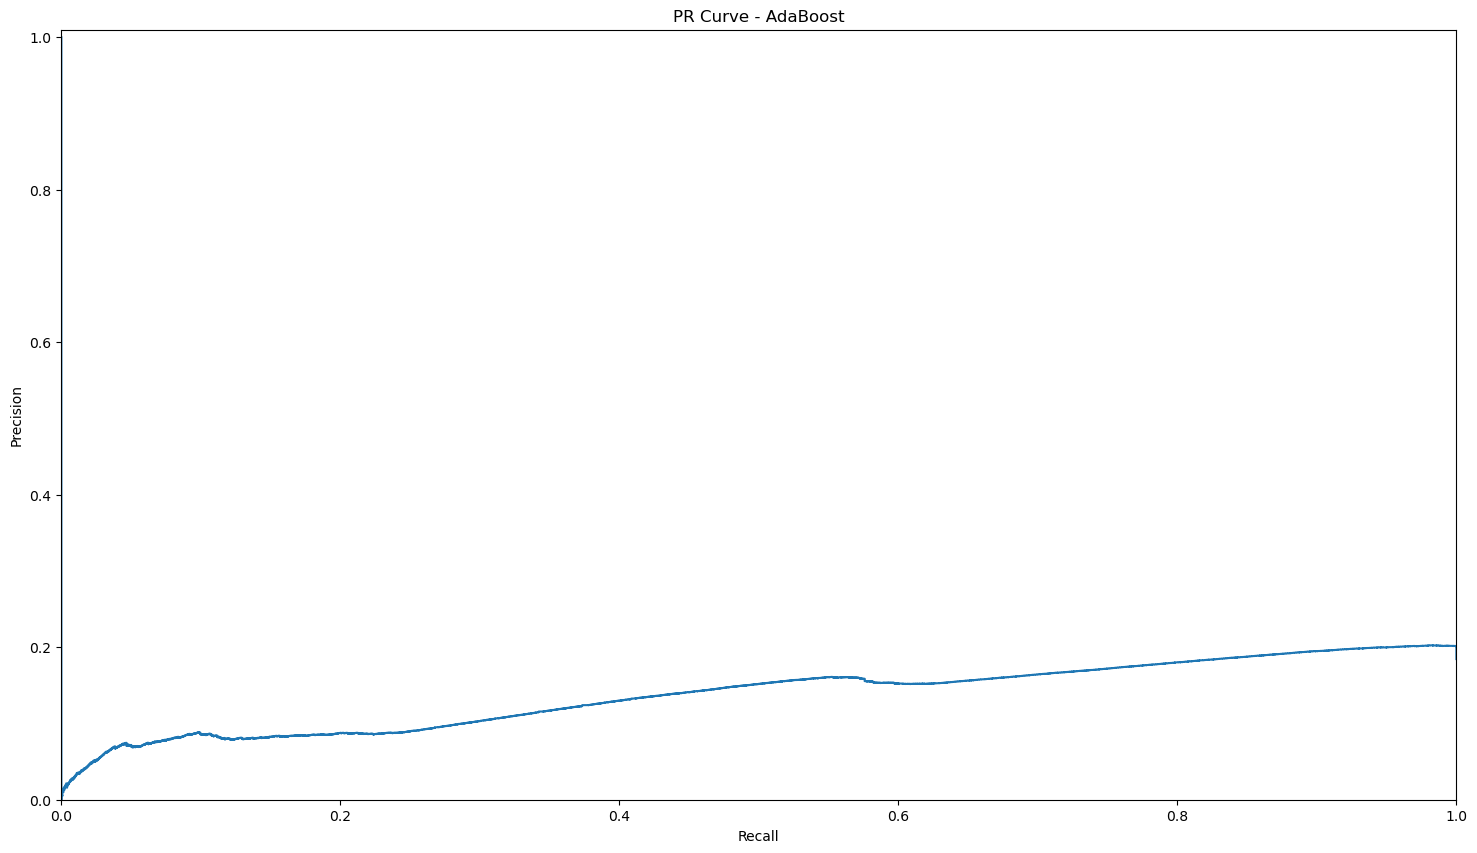

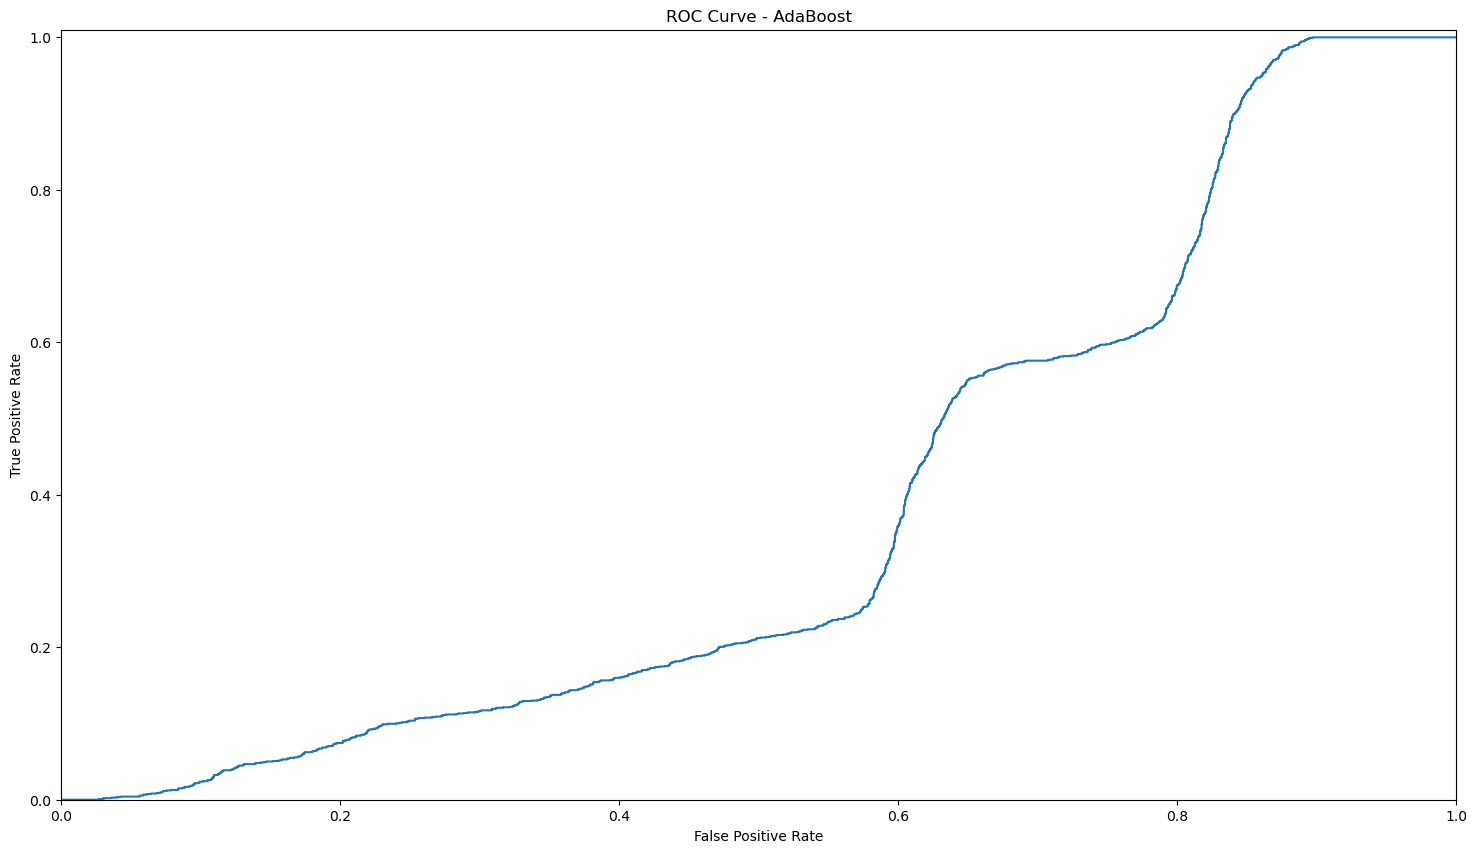

In [127]:
# Binarize the output
Y = label_binarize(y_val_sample, classes=[0, 1, 2, 3])

# Get the probability scores from AdaBoost
y_score_ada = ada_best.predict_proba(X_val_sample)

# Compute Precision-Recall and ROC metrics for AdaBoost
precision["AdaBoost"], recall["AdaBoost"], _ = precision_recall_curve(Y.ravel(), y_score_ada.ravel())
fpr["AdaBoost"], tpr["AdaBoost"], _ = roc_curve(Y.ravel(), y_score_ada.ravel())

# Plot the Precision-Recall Curve
plt.figure(figsize=(18, 10))
plt.step(recall["AdaBoost"], precision["AdaBoost"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - AdaBoost")
plt.show()

# Plot the ROC Curve
plt.figure(figsize=(18, 10))
plt.step(fpr["AdaBoost"], tpr["AdaBoost"], where="post")

plt.title("ROC Curve - AdaBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()


# XGBoost Classifier

In [128]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train_sample)
y_val_encoded = label_encoder.transform(y_val_sample)

parameters = [
    {'learning_rate': [0.1, 0.01, 0.05],
     'subsample': [0.6, 0.8, 0.9],
     'n_estimators': [16, 64, 128]}
]

# Update XGBClassifier to use a CPU-based method
xgb = XGBClassifier(tree_method='hist', random_state=42)  # Changed from 'gpu_hist' to 'hist'
grid = GridSearchCV(xgb, parameters, verbose=0, n_jobs=-1)
grid.fit(X_train_sample, y_train_encoded)

print("Best parameters scores:")
print(grid.best_params_)
best_params["xgb"] = grid.best_params_
print("Train score: ", grid.score(X_train_sample, y_train_encoded))


Best parameters scores:
{'learning_rate': 0.1, 'n_estimators': 128, 'subsample': 0.8}
Train score:  0.92475


In [129]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,5.059704,0.138165,0.132150,0.028452,0.1,128,0.8,"{'learning_rate': 0.1, 'n_estimators': 128, 's...",0.777500,0.776250,0.753125,0.773125,0.778125,0.771625,0.009409,1
8,4.863871,0.120003,0.118004,0.008088,0.1,128,0.9,"{'learning_rate': 0.1, 'n_estimators': 128, 's...",0.770000,0.771875,0.753750,0.780625,0.776875,0.770625,0.009228,2
25,5.048319,0.096925,0.113142,0.007319,0.05,128,0.8,"{'learning_rate': 0.05, 'n_estimators': 128, '...",0.768750,0.769375,0.755625,0.783125,0.772500,0.769875,0.008798,3
6,5.194241,0.093798,0.114994,0.007039,0.1,128,0.6,"{'learning_rate': 0.1, 'n_estimators': 128, 's...",0.773750,0.771250,0.748750,0.775625,0.775000,0.768875,0.010173,4
5,2.739608,0.079978,0.099747,0.018972,0.1,64,0.9,"{'learning_rate': 0.1, 'n_estimators': 64, 'su...",0.772500,0.764375,0.751250,0.782500,0.772500,0.768625,0.010416,5
26,4.558616,0.337082,0.115453,0.010257,0.05,128,0.9,"{'learning_rate': 0.05, 'n_estimators': 128, '...",0.770000,0.765000,0.753750,0.773750,0.775000,0.767500,0.007706,6
24,5.056288,0.072275,0.112942,0.008257,0.05,128,0.6,"{'learning_rate': 0.05, 'n_estimators': 128, '...",0.761875,0.763750,0.758750,0.774375,0.776875,0.767125,0.007165,7
4,2.799109,0.085578,0.100479,0.017449,0.1,64,0.8,"{'learning_rate': 0.1, 'n_estimators': 64, 'su...",0.766250,0.763125,0.755625,0.775000,0.774375,0.766875,0.007256,8
3,3.100509,0.120356,0.125928,0.040927,0.1,64,0.6,"{'learning_rate': 0.1, 'n_estimators': 64, 'su...",0.764375,0.766875,0.754375,0.773125,0.773125,0.766375,0.006919,9
22,2.677441,0.054053,0.092884,0.015636,0.05,64,0.8,"{'learning_rate': 0.05, 'n_estimators': 64, 's...",0.756875,0.757500,0.753125,0.769375,0.766875,0.760750,0.006255,10


In [130]:
print("Best Param scores for XGB:")
xgb = XGBClassifier(**grid.best_params_,random_state=42)

xgb.fit(X_train_sample, y_train_encoded)
# Storing the model trained with best params later used for visualizations
models["XGB Classifier"] = xgb

print("Train Score: ", xgb.score(X_train_sample, y_train_encoded))
print("Validation Score: ", xgb.score(X_val_sample, y_val_encoded))


Best Param scores for XGB:
Train Score:  0.92475
Validation Score:  0.768


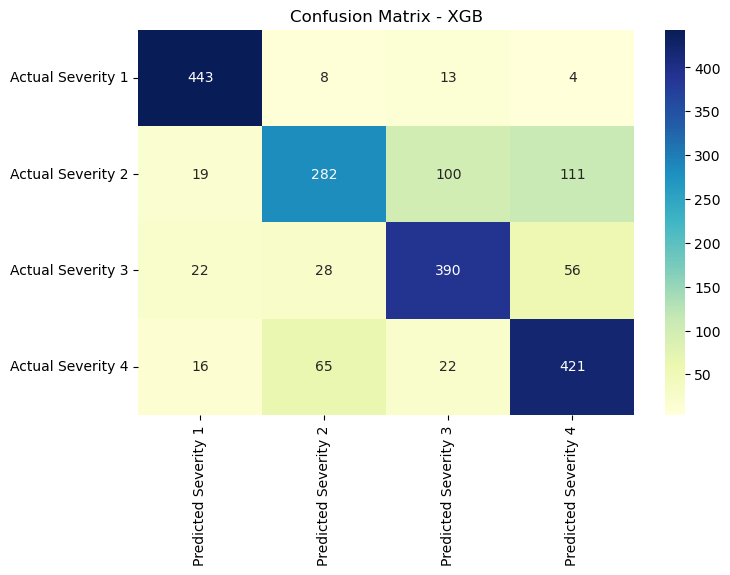

In [131]:
y_pred = xgb.predict(X_val_sample)
confmat = confusion_matrix(y_true=y_val_encoded, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - XGB")
plt.show()

In [132]:
y_pred = xgb.predict(X_val_sample)

accuracy["XGB"] = accuracy_score(y_val_encoded, y_pred)
f1["XGB"] = f1_score(y_val_encoded, y_pred, average="macro")

print(classification_report(y_train_encoded, xgb.predict(X_train_sample)))
print(classification_report(y_val_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2035
           1       0.95      0.82      0.88      1924
           2       0.88      0.93      0.91      2051
           3       0.92      0.96      0.94      1990

    accuracy                           0.92      8000
   macro avg       0.93      0.92      0.92      8000
weighted avg       0.93      0.92      0.92      8000

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       468
           1       0.74      0.55      0.63       512
           2       0.74      0.79      0.76       496
           3       0.71      0.80      0.75       524

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.76      2000



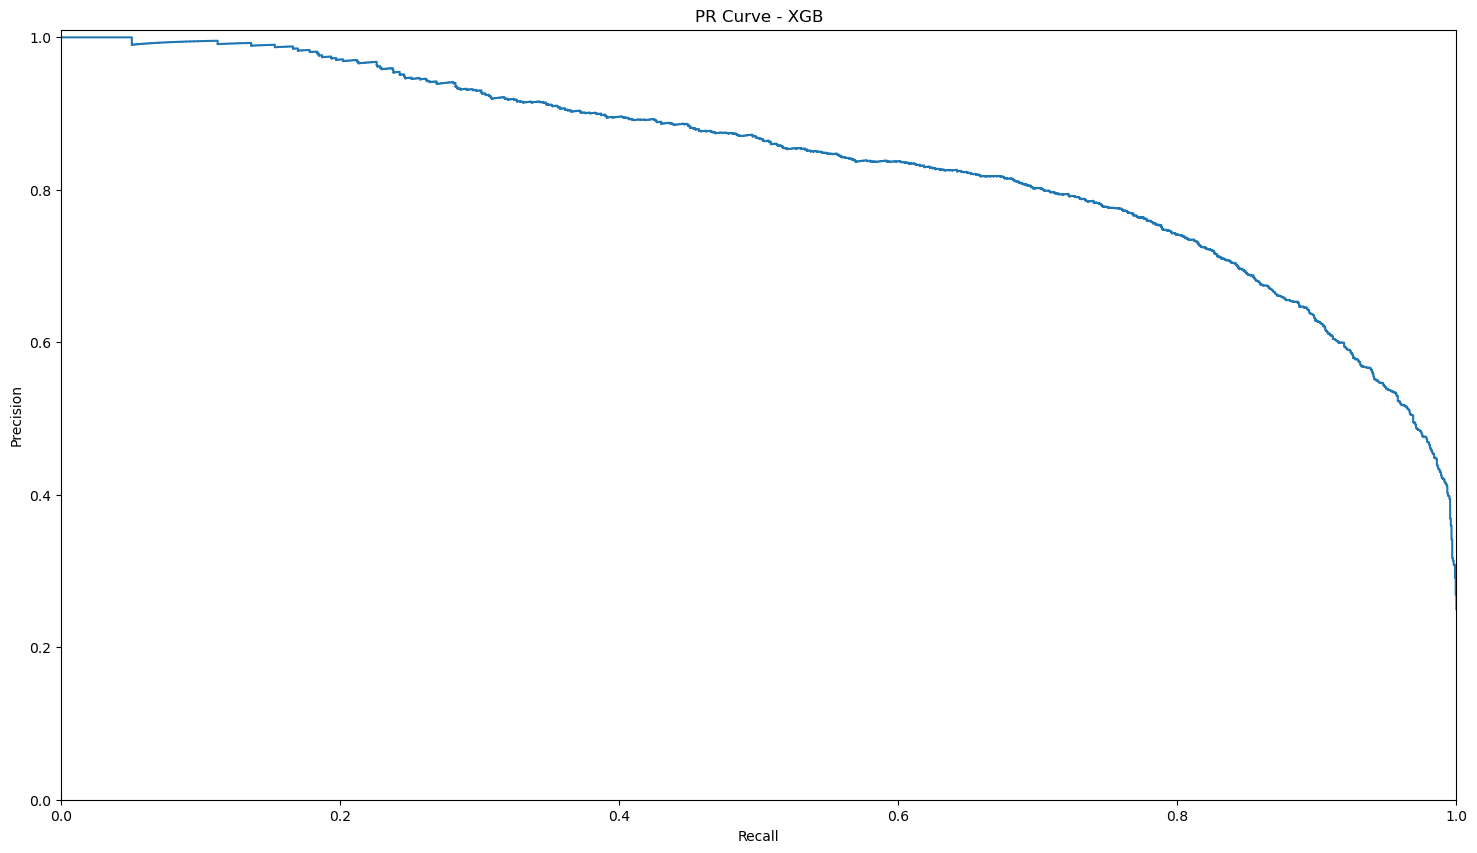

In [133]:
Y = label_binarize(y_val_encoded, classes=[0, 1, 2, 3])

y_score = xgb.predict_proba(X_val_sample)

precision["XGB"], recall["XGB"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["XGB"], tpr["XGB"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["XGB"], precision["XGB"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - XGB")
plt.show()

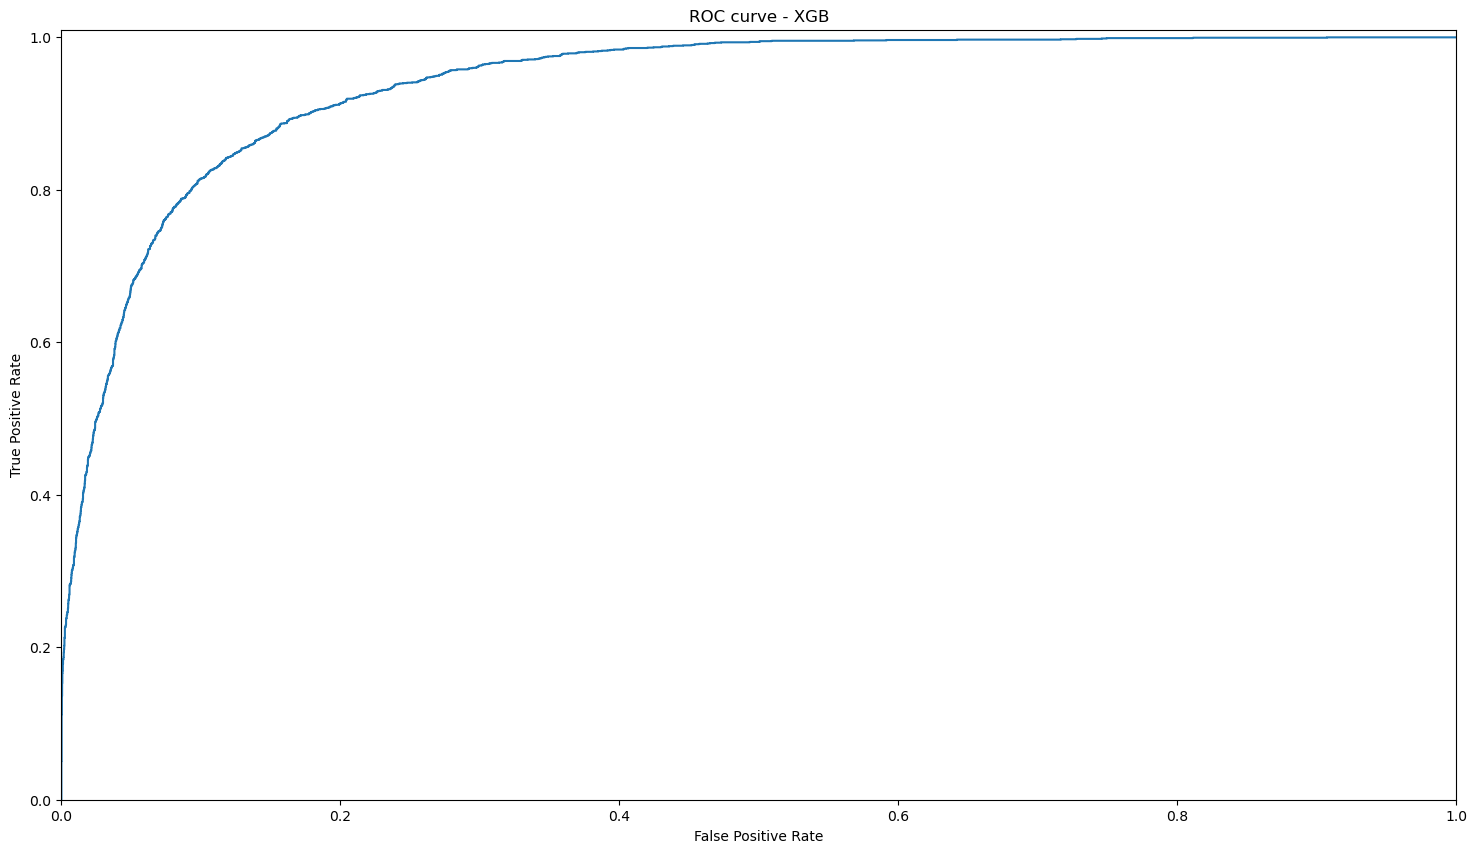

In [134]:
plt.figure(figsize=(18, 10))
plt.step(fpr["XGB"], tpr["XGB"], where="post")

plt.title("ROC curve - XGB")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

# Support Vector Machine

In [135]:
parameters = [{"kernel": ["linear", "rbf", "sigmoid"], "C": [.2, .5, .8, 1.]}, {"kernel": ["poly"], "C": [.2, .5, .8, 1.], "degree": [2, 3, 4]}]
svc = svm.SVC(verbose = 0, random_state = 42, shrinking = False)
grid = GridSearchCV(svc, parameters, verbose = 0, n_jobs = -1)

grid.fit(X_sample_train,y_sample_train)
print("Best parameters scores:")
print(grid.best_params_)
best_params["svc"] = grid.best_params_
print("Train score: ", grid.score(X_sample_train, y_sample_train))

Best parameters scores:
{'C': 1.0, 'kernel': 'rbf'}
Train score:  0.7587


In [136]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,17.208008,1.210704,6.238760,0.128403,1.0,rbf,NaN,"{'C': 1.0, 'kernel': 'rbf'}",0.6940,0.6970,0.6935,0.7020,0.7060,0.6985,0.004817,1
21,16.285141,0.193409,1.988841,0.057619,1.0,poly,2,"{'C': 1.0, 'degree': 2, 'kernel': 'poly'}",0.6925,0.6970,0.6945,0.7015,0.7030,0.6977,0.004007,2
16,15.986317,0.313077,2.318202,0.160985,0.5,poly,3,"{'C': 0.5, 'degree': 3, 'kernel': 'poly'}",0.6930,0.6970,0.6950,0.7010,0.6990,0.6970,0.002828,3
18,15.424176,0.182299,2.021000,0.048731,0.8,poly,2,"{'C': 0.8, 'degree': 2, 'kernel': 'poly'}",0.6940,0.6935,0.6950,0.6990,0.7025,0.6968,0.003444,4
7,16.978805,1.260909,6.433219,0.297926,0.8,rbf,NaN,"{'C': 0.8, 'kernel': 'rbf'}",0.6910,0.6955,0.6935,0.6995,0.7030,0.6965,0.004278,5
19,16.364394,0.195195,2.132136,0.029502,0.8,poly,3,"{'C': 0.8, 'degree': 3, 'kernel': 'poly'}",0.6895,0.6885,0.6970,0.7015,0.7040,0.6961,0.006224,6
9,44.439095,10.372251,1.926827,0.154882,1.0,linear,NaN,"{'C': 1.0, 'kernel': 'linear'}",0.6900,0.6925,0.6975,0.7015,0.6965,0.6956,0.004005,7
22,17.476076,0.130010,2.219301,0.087660,1.0,poly,3,"{'C': 1.0, 'degree': 3, 'kernel': 'poly'}",0.6905,0.6870,0.6965,0.6980,0.7055,0.6955,0.006395,8
6,36.230512,7.929330,1.613162,0.218269,0.8,linear,NaN,"{'C': 0.8, 'kernel': 'linear'}",0.6905,0.6915,0.6990,0.6985,0.6970,0.6953,0.003586,9
15,15.530968,0.122380,2.138245,0.051513,0.5,poly,2,"{'C': 0.5, 'degree': 2, 'kernel': 'poly'}",0.6910,0.6945,0.6900,0.6995,0.6970,0.6944,0.003569,10


In [137]:
### We run the model on partial Dataset for fast training and observing the op/s.
print("Best Param scores for SVM:")
svc = svm.SVC(verbose = 0, random_state = 42, shrinking = False, C=1, kernel = 'rbf', degree = 4)

svc.fit(X_train_sample, y_train_sample)
# Storing the model trained with best params later used for visualizations
models["Support Vector Machine"] = svc

print("Train score:", svc.score(X_train_sample, y_train_sample))
print("Validation score:", svc.score(X_val_sample, y_val_sample))

Best Param scores for SVM:
Train score: 0.76675
Validation score: 0.6705


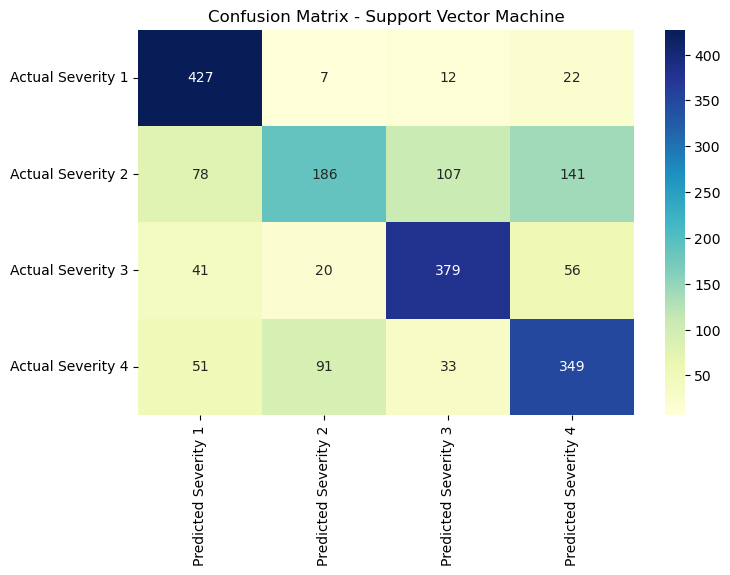

In [138]:
y_pred = svc.predict(X_val_sample)
confmat = confusion_matrix(y_true=y_val_sample, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

In [139]:
y_pred = svc.predict(X_val_sample)

accuracy["SVM"] = accuracy_score(y_val_sample, y_pred)
f1["SVM"] = f1_score(y_val_sample, y_pred, average="macro")

print(classification_report(y_train_sample, svc.predict(X_train_sample)))
print(classification_report(y_val_sample, y_pred))


              precision    recall  f1-score   support

           1       0.80      0.94      0.87      2035
           2       0.82      0.49      0.62      1924
           3       0.74      0.82      0.78      2051
           4       0.73      0.80      0.76      1990

    accuracy                           0.77      8000
   macro avg       0.77      0.76      0.76      8000
weighted avg       0.77      0.77      0.76      8000

              precision    recall  f1-score   support

           1       0.72      0.91      0.80       468
           2       0.61      0.36      0.46       512
           3       0.71      0.76      0.74       496
           4       0.61      0.67      0.64       524

    accuracy                           0.67      2000
   macro avg       0.66      0.68      0.66      2000
weighted avg       0.66      0.67      0.65      2000



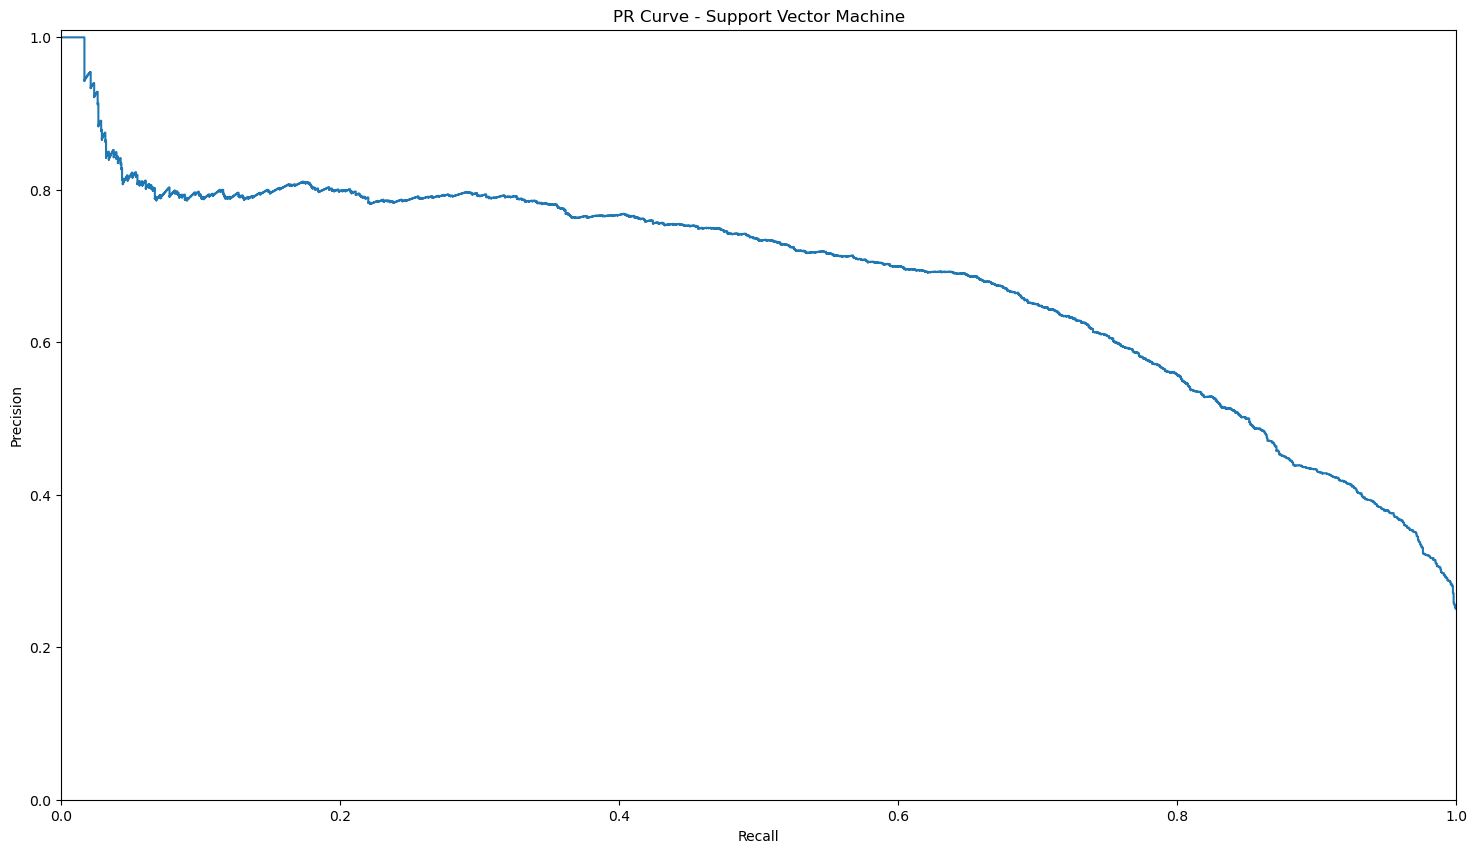

In [140]:
Y = label_binarize(y_val_sample, classes=[1, 2, 3, 4])

y_score = svc.decision_function(X_val_sample)

precision["SVM"], recall["SVM"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["SVM"], tpr["SVM"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["SVM"], precision["SVM"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Support Vector Machine")
plt.show()

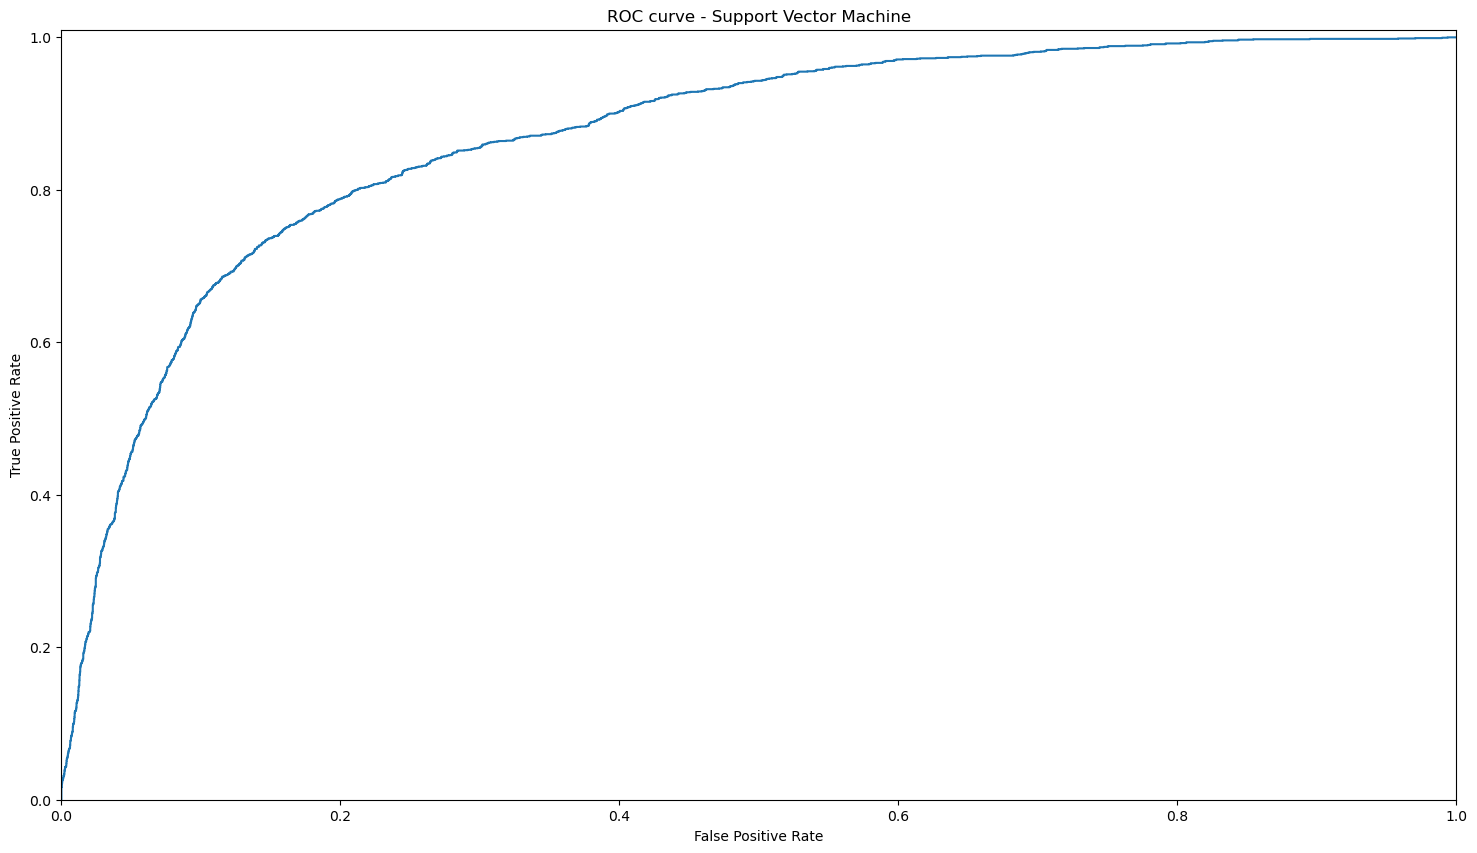

In [141]:
plt.figure(figsize=(18, 10))
plt.step(fpr["SVM"], tpr["SVM"], where="post")

plt.title("ROC curve - Support Vector Machine")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

Accuracy Metric Comparision between Models

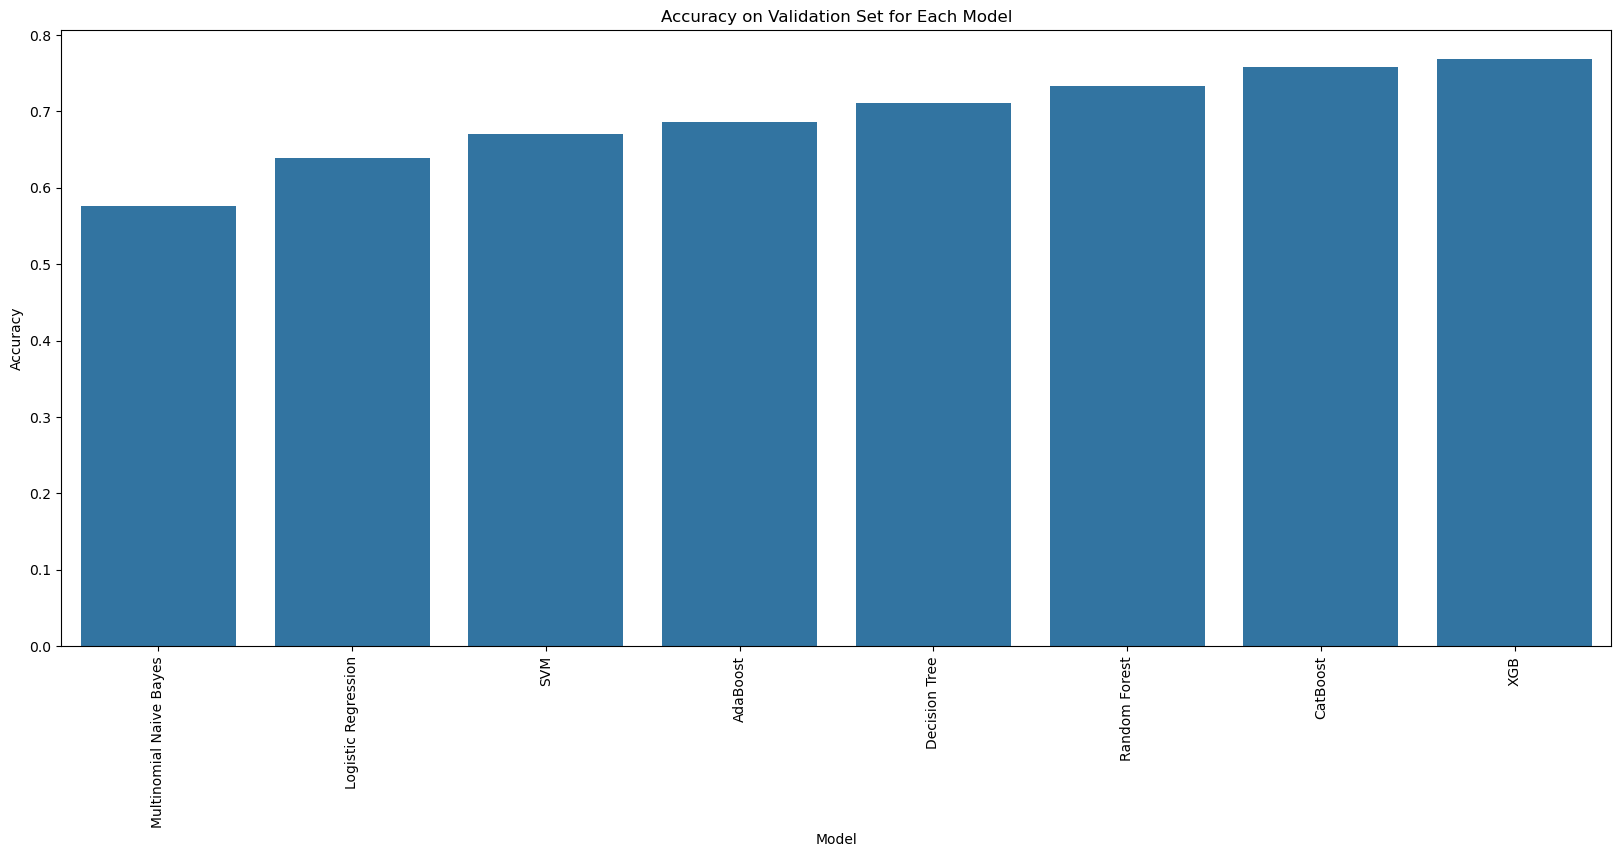

In [142]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation Set for Each Model")
sorted_accuracy = sorted(accuracy.items(), key=lambda x: x[1])
sorted_labels = [item[0] for item in sorted_accuracy]
sorted_values = [item[1] for item in sorted_accuracy]
sns.barplot(x=sorted_labels, y=sorted_values)
plt.xticks(rotation=90)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.savefig("All_Models_Accuracy_Score_Plot_on_Val_Set.png",bbox_inches = 'tight', dpi = 300)
plt.show()

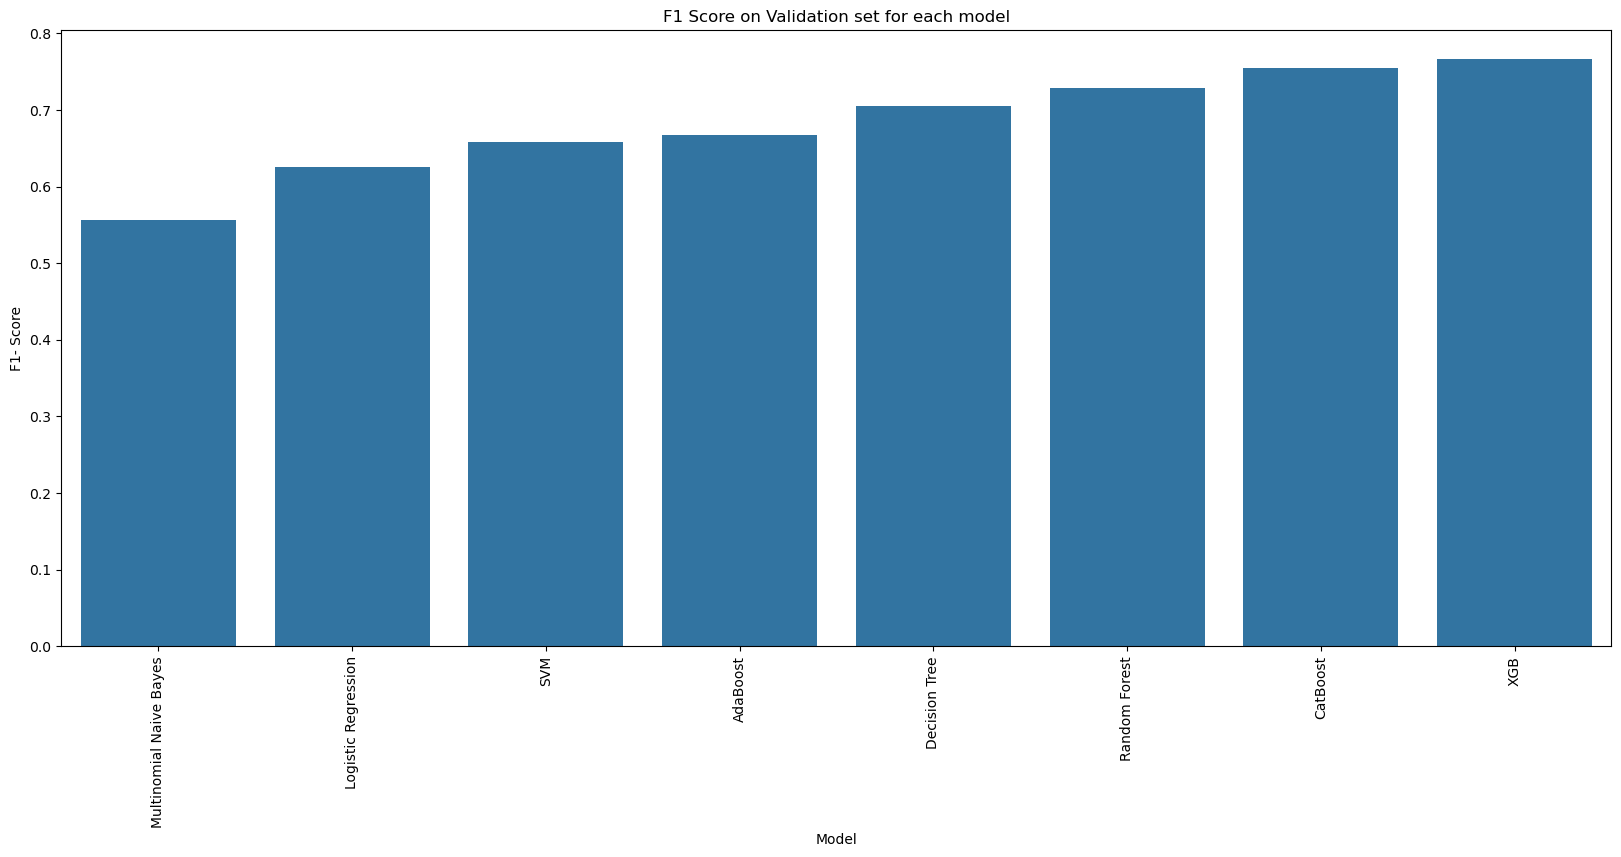

In [143]:
plt.figure(figsize=(20, 8))
plt.title("F1 Score on Validation set for each model")
sorted_f1 = sorted(f1.items(), key=lambda x: x[1])
sorted_labels = [item[0] for item in sorted_f1]
sorted_values = [item[1] for item in sorted_f1]
sns.barplot(x=sorted_labels, y=sorted_values)
plt.xticks(rotation=90)
plt.xlabel("Model")
plt.ylabel("F1- Score")
plt.savefig("All_Models_F1_Score_Plot_on_Val_Set.png",bbox_inches = 'tight', dpi = 300)
plt.show()

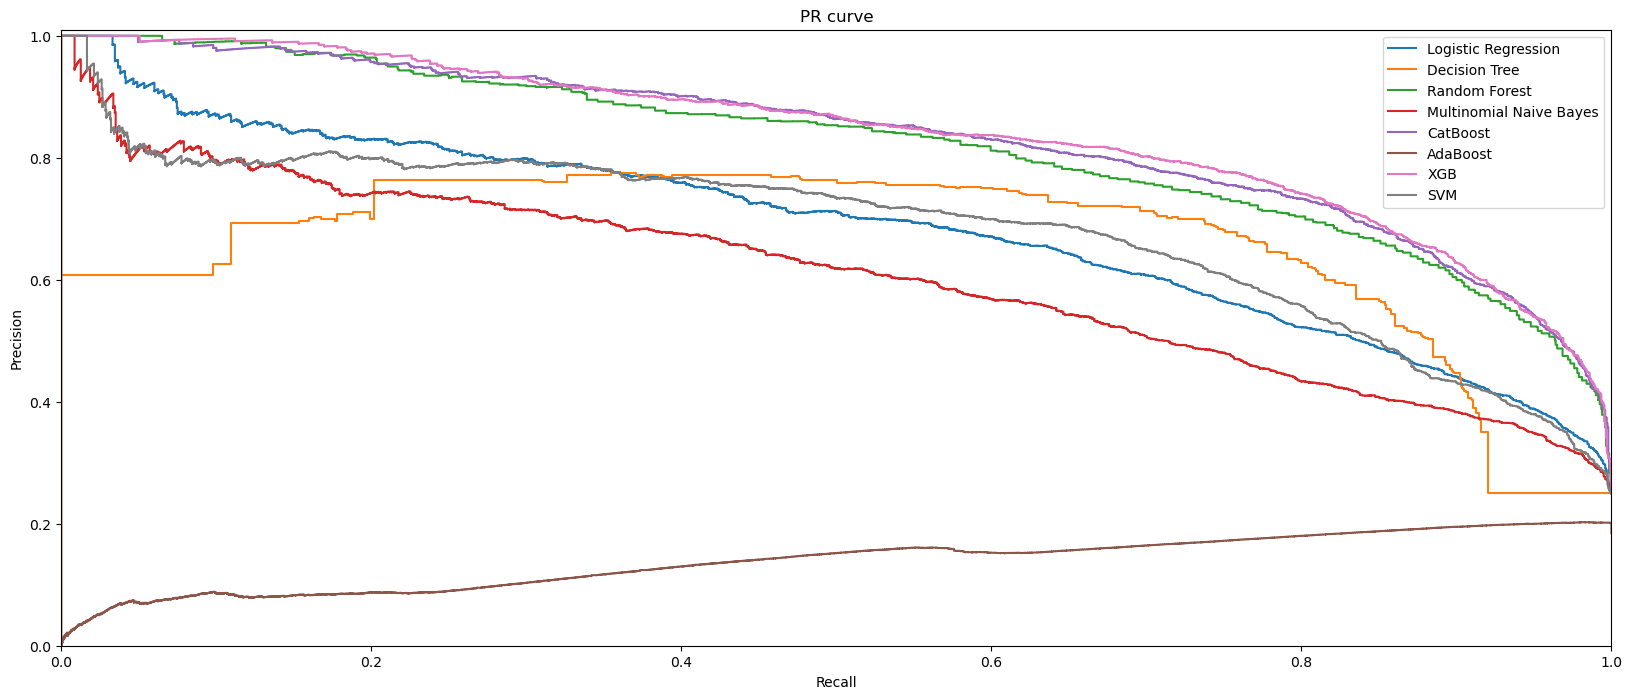

In [144]:
plt.figure(figsize=(20, 8))
for key in f1.keys():
    plt.step(recall[key], precision[key], where="post", label=key)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR curve")
plt.legend()
plt.savefig("All_Models_PR_Curve_plot.png",bbox_inches = 'tight', dpi = 300)
plt.show()

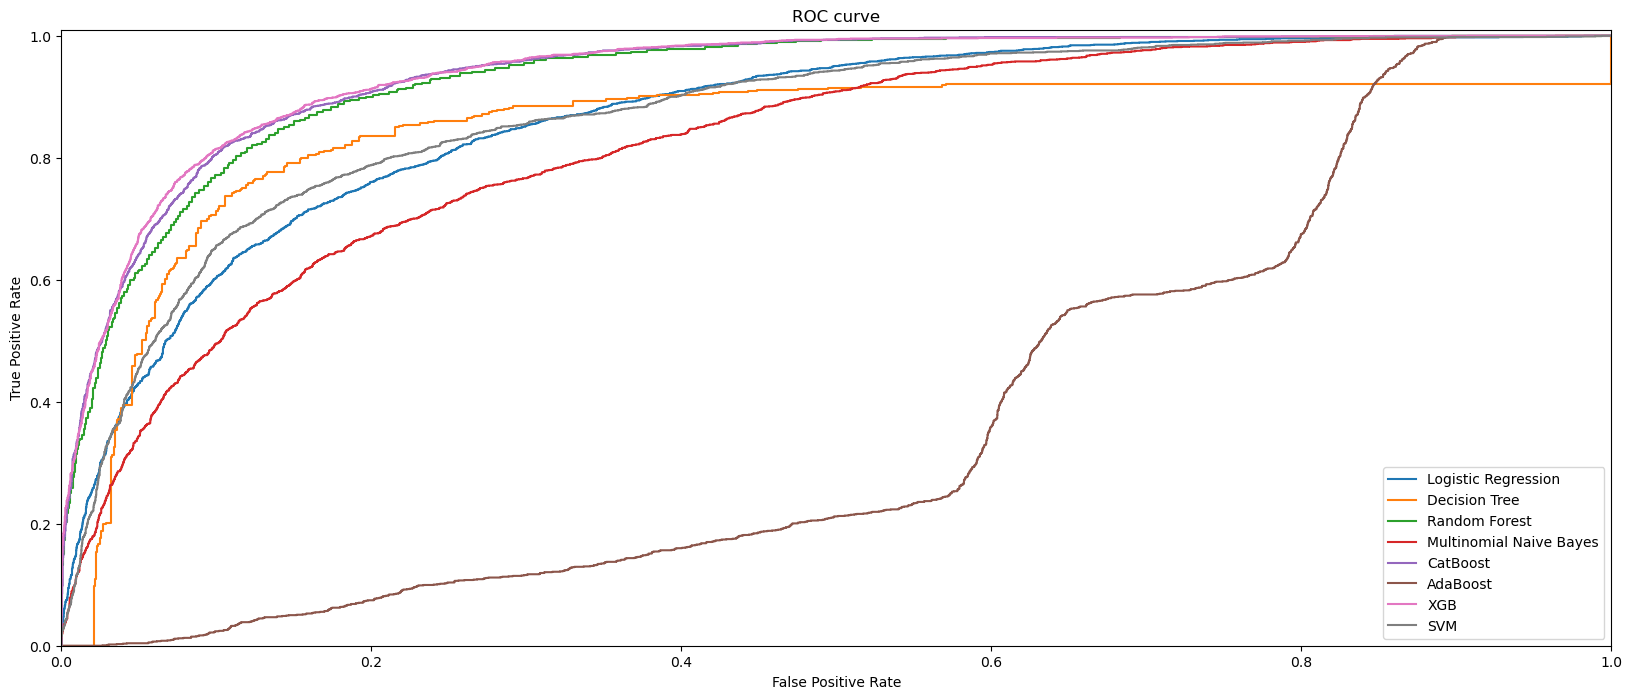

In [145]:
plt.figure(figsize=(20, 8))
for key in f1.keys():
    plt.step(fpr[key], tpr[key], where="post", label=key)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("ROC curve")
plt.legend()
plt.savefig("All_Models_ROC_Curve_plot.png",bbox_inches = 'tight', dpi = 300)
plt.show()